# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [1]:
# Import the visualization code
import visuals as vs
import os

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

In [1]:
%run -i smartcab/agent.py


/-------------------------
| Training trial 1
\-------------------------


/-------------------
| Step 0 Results
\-------------------

!! Agent state not been updated!
Agent attempted driving forward through a red light. (rewarded -9.65)
Agent not enforced to meet deadline.

/-------------------
| Step 1 Results
\-------------------

!! Agent state not been updated!
Agent attempted driving left through a red light. (rewarded -10.38)
Agent not enforced to meet deadline.

/-------------------
| Step 2 Results
\-------------------

!! Agent state not been updated!
Agent attempted driving forward through a red light. (rewarded -9.53)
Agent not enforced to meet deadline.

/-------------------
| Step 3 Results
\-------------------

!! Agent state not been updated!
Agent attempted driving forward through a red light. (rewarded -10.68)
Agent not enforced to meet deadline.

/-------------------
| Step 4 Results
\-------------------

!! Agent state not been updated!
Agent attempted driving left

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:**

After running the simulations, it can be seen that the smartcab does not move at all during the entire simulations. It stays in the same spot the entire time. 

During the simulation the agent is receiving just one reward, it seems from the safety metric(i.e. traffic lights) since there is another message saying: "Agent not enforced to meet the deadline."

It is quite clear that the traffic light directly impacts the rewards. That is, when the smartcab stays during the red light it receives positive rewards. In contrast, when it does not take any action and remains in the same spot during the green light, it gets a negative reward

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**

In general, we can detect 12 flags divided into 3 areas, the environment, the agent, and the simulation. For instance, I will illustrate 3 flags, one from each area. First, when setting up the environment we have a flag called 'num_dummies', and integer values that establish the number of dummy agents in the environment, the default value is 100. Second, when creating the agent, we can setup the exploration factor with the flag 'epsilon'. Last, the flag 'display' a boolean value that, while configuring the simulator can be turn off and on to enable or disable the GUI. 

When an agent performs an action the function 'def act(self, agent, action)' is called.

The difference between 'render_text()' and 'render' is that the first is called when the GUI is not enabled, and the agent score and status are written in the console, meanwhile 'render' is called when the GUI is displayed.

'next_waypoint()' considers the East-West direction first.

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'left'` (turn left), `right'` (turn right), or `'forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


In [7]:
%run -i smartcab/agent.py


/-------------------------
| Training trial 1
\-------------------------


/-------------------
| Step 0 Results
\-------------------

!! Agent state not been updated!
Agent drove right instead of left. (rewarded 0.58)
97% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

!! Agent state not been updated!
Agent attempted driving left through a red light. (rewarded -9.44)
94% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

!! Agent state not been updated!
Agent attempted driving forward through a red light with traffic and cause a major accident. (rewarded -39.84)
91% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

!! Agent state not been updated!
Agent attempted driving left through a red light. (rewarded -10.24)
89% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

!! Agent state 

75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

!! Agent state not been updated!
Agent drove forward instead of left. (rewarded 0.53)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

!! Agent state not been updated!
Agent drove right instead of left. (rewarded 0.59)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

!! Agent state not been updated!
Agent attempted driving forward through a red light. (rewarded -9.77)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

!! Agent state not been updated!
Agent attempted driving left through a red light. (rewarded -10.61)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

!! Agent state not been updated!
Agent drove forward instead of left. (rewarded 0.75)
50% of time rem


/-------------------
| Step 25 Results
\-------------------

!! Agent state not been updated!
Agent drove right instead of forward. (rewarded -0.01)
13% of time remaining to reach destination.

/-------------------
| Step 26 Results
\-------------------

!! Agent state not been updated!
Agent attempted driving right through traffic and cause a minor accident. (rewarded -20.05)
10% of time remaining to reach destination.

/-------------------
| Step 27 Results
\-------------------

!! Agent state not been updated!
Agent drove right instead of left. (rewarded 0.24)
7% of time remaining to reach destination.

/-------------------
| Step 28 Results
\-------------------

!! Agent state not been updated!
Agent attempted driving forward through a red light. (rewarded -10.93)
3% of time remaining to reach destination.

/-------------------
| Step 29 Results
\-------------------

!! Agent state not been updated!
Agent drove right instead of forward. (rewarded 0.98)
0% of time remaining to reac


/-------------------
| Step 10 Results
\-------------------

!! Agent state not been updated!
Agent followed the waypoint right. (rewarded 1.19)
45% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

!! Agent state not been updated!
Agent drove right instead of forward. (rewarded 0.69)
40% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

!! Agent state not been updated!
Agent drove forward instead of left. (rewarded 0.34)
35% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

!! Agent state not been updated!
Agent attempted driving forward through a red light. (rewarded -10.84)
30% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

!! Agent state not been updated!
Agent attempted driving left through a red light. (rewarded -10.33)
25% of time remaining to reach destination.

/------


/-------------------
| Step 8 Results
\-------------------

!! Agent state not been updated!
Agent idled at a green light with no oncoming traffic. (rewarded -4.55)
74% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

!! Agent state not been updated!
Agent drove forward instead of left. (rewarded 0.00)
71% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

!! Agent state not been updated!
Agent drove right instead of left. (rewarded 1.51)
69% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

!! Agent state not been updated!
Agent followed the waypoint forward. (rewarded 2.38)
66% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

!! Agent state not been updated!
Agent idled at a green light with no oncoming traffic. (rewarded -4.65)
63% of time remaining to reach destination.

/----

| Step 15 Results
\-------------------

!! Agent state not been updated!
Agent drove right instead of left. (rewarded 1.26)
54% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

!! Agent state not been updated!
Agent attempted driving forward through a red light with traffic and cause a major accident. (rewarded -40.58)
51% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

!! Agent state not been updated!
Agent attempted driving left through a red light. (rewarded -10.29)
49% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

!! Agent state not been updated!
Agent attempted driving forward through a red light. (rewarded -9.67)
46% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

!! Agent state not been updated!
Agent properly idled at a red light. (rewarded 2.21)
43% of time remain


/-------------------------
| Training trial 10
\-------------------------


/-------------------
| Step 0 Results
\-------------------

!! Agent state not been updated!
Agent followed the waypoint left. (rewarded 1.97)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

!! Agent state not been updated!
Agent drove right instead of forward. (rewarded 1.87)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

!! Agent state not been updated!
Agent followed the waypoint left. (rewarded 2.30)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

!! Agent state not been updated!
Agent followed the waypoint right. (rewarded 2.04)
80% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 11
\-------------------------


/-------------------
| Step 0 Results
\--


/-------------------
| Step 18 Results
\-------------------

!! Agent state not been updated!
Agent drove right instead of left. (rewarded 1.31)
24% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

!! Agent state not been updated!
Agent properly idled at a red light. (rewarded -0.23)
20% of time remaining to reach destination.

/-------------------
| Step 20 Results
\-------------------

!! Agent state not been updated!
Agent attempted driving left through a red light. (rewarded -10.58)
16% of time remaining to reach destination.

/-------------------
| Step 21 Results
\-------------------

!! Agent state not been updated!
Agent drove forward instead of right. (rewarded 1.06)
12% of time remaining to reach destination.

/-------------------
| Step 22 Results
\-------------------

!! Agent state not been updated!
Agent followed the waypoint right. (rewarded 1.32)
8% of time remaining to reach destination.

/-------------------
| Step

!! Agent state not been updated!
Agent drove right instead of forward. (rewarded -0.06)
20% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

!! Agent state not been updated!
Agent drove forward instead of left. (rewarded 1.21)
15% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

!! Agent state not been updated!
Agent properly idled at a red light. (rewarded 0.51)
10% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

!! Agent state not been updated!
Agent attempted driving forward through a red light. (rewarded -9.90)
5% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

!! Agent state not been updated!
Agent attempted driving right through traffic and cause a minor accident. (rewarded -20.03)
0% of time remaining to reach destination.

Trial Aborted!
Agent did not reach the destin

!! Agent state not been updated!
Agent attempted driving forward through a red light. (rewarded -10.82)
45% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

!! Agent state not been updated!
Agent attempted driving forward through a red light. (rewarded -9.41)
40% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

!! Agent state not been updated!
Agent attempted driving forward through a red light. (rewarded -10.60)
35% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

!! Agent state not been updated!
Agent drove forward instead of right. (rewarded 0.47)
30% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

!! Agent state not been updated!
Agent followed the waypoint right. (rewarded 1.45)
25% of time remaining to reach destination.

/-------------------
| Step 15 Results
\---------


/-------------------
| Step 5 Results
\-------------------

!! Agent state not been updated!
Agent drove left instead of forward. (rewarded 1.91)
76% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

!! Agent state not been updated!
Agent drove left instead of right. (rewarded -0.02)
72% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

!! Agent state not been updated!
Agent idled at a green light with no oncoming traffic. (rewarded -5.57)
68% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

!! Agent state not been updated!
Agent followed the waypoint left. (rewarded 2.04)
64% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

!! Agent state not been updated!
Agent attempted driving forward through a red light with traffic and cause a major accident. (rewarded -40.18)
60% of time rema

Agent attempted driving left through a red light. (rewarded -10.39)
12% of time remaining to reach destination.

/-------------------
| Step 22 Results
\-------------------

!! Agent state not been updated!
Agent drove forward instead of right. (rewarded 0.26)
8% of time remaining to reach destination.

/-------------------
| Step 23 Results
\-------------------

!! Agent state not been updated!
Agent followed the waypoint right. (rewarded 1.44)
4% of time remaining to reach destination.

/-------------------
| Step 24 Results
\-------------------

!! Agent state not been updated!
Agent properly idled at a red light. (rewarded 1.50)
0% of time remaining to reach destination.

Trial Aborted!
Agent did not reach the destination.

/-------------------------
| Training trial 20
\-------------------------


/-------------------
| Step 0 Results
\-------------------

!! Agent state not been updated!
Agent drove right instead of left. (rewarded 0.47)
96% of time remaining to reach destination

\-------------------

!! Agent state not been updated!
Agent drove right instead of forward. (rewarded 1.19)
40% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

!! Agent state not been updated!
Agent attempted driving forward through a red light with traffic and cause a major accident. (rewarded -39.99)
36% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

!! Agent state not been updated!
Agent attempted driving left through a red light with traffic and cause a major accident. (rewarded -40.75)
32% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

!! Agent state not been updated!
Agent drove right instead of left. (rewarded 1.25)
28% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

!! Agent state not been updated!
Agent drove forward instead of left. (rewarded 1.30)
24% of time 

80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

!! Agent state not been updated!
Agent drove left instead of right. (rewarded 0.07)
76% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

!! Agent state not been updated!
Agent attempted driving left through a red light. (rewarded -9.29)
72% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

!! Agent state not been updated!
Agent idled at a green light with no oncoming traffic. (rewarded -4.80)
68% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

!! Agent state not been updated!
Agent drove right instead of forward. (rewarded 1.43)
64% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

!! Agent state not been updated!
Agent properly idled at a red light. (rewarded 2.02)
60% of time r

| Step 2 Results
\-------------------

!! Agent state not been updated!
Agent attempted driving forward through a red light. (rewarded -9.02)
90% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

!! Agent state not been updated!
Agent drove right instead of left. (rewarded 1.24)
87% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

!! Agent state not been updated!
Agent followed the waypoint forward. (rewarded 2.69)
83% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

!! Agent state not been updated!
Agent attempted driving forward through a red light with traffic and cause a major accident. (rewarded -40.41)
80% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

!! Agent state not been updated!
Agent attempted driving left through a red light. (rewarded -9.43)
77% of time remaining to

!! Agent state not been updated!
Agent properly idled at a red light. (rewarded 1.71)
48% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

!! Agent state not been updated!
Agent drove left instead of forward. (rewarded 0.79)
44% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

!! Agent state not been updated!
Agent idled at a green light with no oncoming traffic. (rewarded -5.79)
40% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

!! Agent state not been updated!
Agent drove left instead of right. (rewarded 1.48)
36% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

!! Agent state not been updated!
Agent attempted driving left through a red light. (rewarded -10.07)
32% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

!! Agent


/-------------------
| Step 4 Results
\-------------------

!! Agent state not been updated!
Agent drove right instead of forward. (rewarded 0.52)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

!! Agent state not been updated!
Agent drove forward instead of left. (rewarded -0.01)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

!! Agent state not been updated!
Agent attempted driving left through a red light. (rewarded -10.52)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

!! Agent state not been updated!
Agent followed the waypoint left. (rewarded 1.04)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

!! Agent state not been updated!
Agent drove right instead of forward. (rewarded 1.65)
55% of time remaining to reach destination.

/-------------------
| Step 9

!! Agent state not been updated!
Agent drove forward instead of left. (rewarded -0.49)
10% of time remaining to reach destination.

/-------------------
| Step 27 Results
\-------------------

!! Agent state not been updated!
Agent followed the waypoint left. (rewarded 0.96)
7% of time remaining to reach destination.

/-------------------
| Step 28 Results
\-------------------

!! Agent state not been updated!
Agent drove right instead of left. (rewarded 0.33)
3% of time remaining to reach destination.

/-------------------
| Step 29 Results
\-------------------

!! Agent state not been updated!
Agent attempted driving left through a red light. (rewarded -10.52)
0% of time remaining to reach destination.

Trial Aborted!
Agent did not reach the destination.

/-------------------------
| Testing trial 10
\-------------------------


/-------------------
| Step 0 Results
\-------------------

!! Agent state not been updated!
Agent drove right instead of left. (rewarded 1.86)
96% of time r

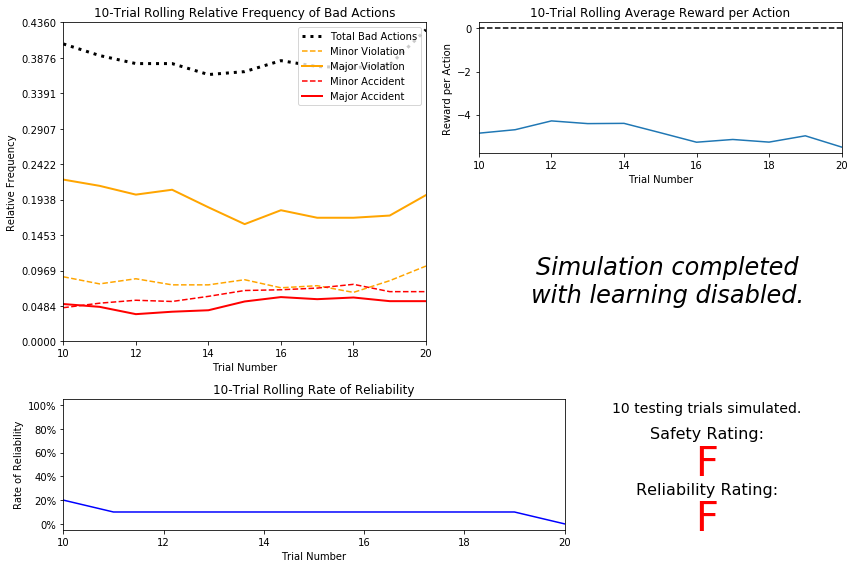

In [8]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliability make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**

**How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?**<br>
The agent is making around 40% of the time bad decisions. These wrong actions cause around 20% of the time an accident, combined minor or major, the second being more frequent.<br>
**Given that the agent is driving randomly, does the rate of reliability make sense?**<br>
Yes, an F is expected due to the fact that the agent never reaches the destination and cause major incidents.<br>
**What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?**<br>
The chart above is clear in summarizing the reward received by the agent. Every time in each trial receives a negative reward. Actually, looking at the line's behaviour we can detect that after every trial tends to get worse.<br>
**As the number of trials increases, does the outcome of results change significantly?**<br>
I do not consider that the outcome change significantly, but it maintains a sharp increase in the number of bad actions and negative reward. The reliability rate remains steady most of the time, just minor changes can be observed. <br>
**Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?**<br>
Based on the analysis, I do not consider the smartcab reliable and safe. It never reaches the destination, half of the time takes bad decisions, fourth of the times commit a major violation and causes both, major and minor accidents.<br>

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate? Please note that whatever features you eventually choose for your agent's state, must be argued for here. That is: your code in agent.py should reflect the features chosen in this answer.
*

NOTE: You are not allowed to engineer new features for the smartcab. 

**Answer:**

I consider that we can divide the variables into two types, one for 'safety' and the other one for 'efficiency'. In the first variable, we can allocate all the data that is included in the 'inputs' variables. For the second type, we can use 'waypoint' and 'deadline'.

Briefly, I will discuss the importance of each variable regarding safety contained in 'inputs'.

'light' could prevent the smartcab to commit an accident, since it provides the information about the traffic light at the intersection, it could help to decide either to move or not in order to not crash with another agent. Also, part of the safety grade is not to violate the traffic rules and traffic light are part of that.

'left' and 'right' provide the same information, the only difference is the side that they check, it is clear the side that each one check based on their name. It prevents the smartcab to turn left or right when another agent is on that specific side, preventing an accident.

'oncoming' it might help to prevent an incident with the car across the intersection, the smartcab has to be careful since it might turn to the same direction at the same time causing a crash.

From the efficiency point of view, we have two variables: 'waypoint', and 'deadline'. 'waypoint' guides the smartcab to go to the direction selected(i.e. right, forward, left). Meanwhile, 'deadline' informs how much time remains, which could have an impact in the smartcab as it learns, it could produce an effect of "hurry" to meet the destination point before the 'deadline' ends. 

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the environment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:**

Considering the six variables, we have the follwing options:
- waypoint - 3 options, right, left, forward.
- light - 2 options, Green, Red
- left - 4 options, True or False
- right - 4 options, True or False
- oncoming - 4 options, None, Left, Forward
- deadline - remaining time.

If we consider the entire features, the agent could not learn at all. Thinking the state space optimization, the first feature that we have to remove from the environment is deadline. Deadline is a continuous variable, and could be almost impossible for the agent to learn from each remaining time plus the value of the other features. 

Then we have 5 features, one with 3 options, another with two, and 3 with 4 options which give us 3\*2\*4\*4\*4 = 384 states. It might be possible that the agent can learn 384 states if the simulation runs during a long period of time, however I consider that there are many states. 

Running the simulator we can view that the 'right' input does not provide much insight from the environment since there are no U-turns and the traffic light could prevent any potential crash from a car coming from the right side. Maybe just an accident could happen if the agent decides to go forward with red light and the car in the right tries to go forwad or turn left, however for such scenario the agent must learn that with red light te optimal action is 'None'. Hence, we can omit the 'right' input and reduce the state space to 3\*2\*4\*4\ = 96 

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the iterative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.05). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

In [55]:
%run -i smartcab/agent.py


/-------------------------
| Training trial 1
\-------------------------


/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('right', 'red', 'left', 'left')
Agent properly idled at a red light. (rewarded 1.87)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('right', 'red', None, 'left')
Agent attempted driving left through a red light. (rewarded -9.89)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('right', 'red', 'left', 'left')
Agent attempted driving left through a red light. (rewarded -9.23)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('right', 'red', None, 'left')
Agent attempted driving left through a red light. (rewarded -9.27)
80% of time remaining to reach destination.

/-------------------
| Step 4 Resu

| Step 19 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.08)
0% of time remaining to reach destination.

Trial Aborted!
Agent did not reach the destination.

/-------------------------
| Training trial 3
\-------------------------


/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('right', 'red', 'forward', 'left')
Agent attempted driving forward through a red light with traffic and cause a major accident. (rewarded -39.80)
96% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('right', 'red', None, 'left')
Agent attempted driving forward through a red light. (rewarded -10.83)
92% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('right', 'red', None, 'left')
Agent followed the waypoint right. (rewarded 2.04)
88% of time rem

\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent idled at a green light with no oncoming traffic. (rewarded -4.17)
0% of time remaining to reach destination.

Trial Aborted!
Agent did not reach the destination.

/-------------------------
| Training trial 5
\-------------------------


/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('right', 'green', 'right', 'forward')
Agent followed the waypoint right. (rewarded 1.05)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent attempted driving left through a red light. (rewarded -10.48)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent attempted driving forward through a red light. (rewarded -10.91)
85% of time remaining to reach destination.

/----------


/-------------------
| Step 19 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent attempted driving left through a red light. (rewarded -10.29)
0% of time remaining to reach destination.

Trial Aborted!
Agent did not reach the destination.

/-------------------------
| Training trial 7
\-------------------------


/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.82)
96% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.80)
92% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent attempted driving left through a red light. (rewarded -9.33)
88% of time remaining to reach destination.

/---


/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('forward', 'green', 'right', None)
Agent drove left instead of forward. (rewarded 0.57)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('right', 'green', 'left', None)
Agent idled at a green light with no oncoming traffic. (rewarded -5.35)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('right', 'green', 'right', 'right')
Agent drove forward instead of right. (rewarded 0.29)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('right', 'red', None, 'left')
Agent followed the waypoint right. (rewarded 2.75)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('forward', 'green', 'left', None)
Agent d


/-------------------
| Step 18 Results
\-------------------

Agent previous state: ('left', 'green', None, 'left')
Agent followed the waypoint left. (rewarded 1.08)
24% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

Agent previous state: ('left', 'red', 'right', None)
Agent properly idled at a red light. (rewarded 1.66)
20% of time remaining to reach destination.

/-------------------
| Step 20 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent attempted driving left through a red light. (rewarded -10.72)
16% of time remaining to reach destination.

/-------------------
| Step 21 Results
\-------------------

Agent previous state: ('left', 'green', 'left', None)
Agent followed the waypoint left. (rewarded 1.44)
12% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 11
\-------------------------


/-----------------


Agent previous state: ('left', 'green', 'forward', None)
Agent drove forward instead of left. (rewarded 1.25)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('left', 'green', None, 'forward')
Agent drove right instead of left. (rewarded 1.34)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 1.26)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'forward')
Agent drove right instead of forward. (rewarded 0.73)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('left', 'green', None, 'left')
Agent followed the waypoint left. (rewarded 1.60)
60% of time remaining to reach d

/-------------------
| Step 21 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent attempted driving forward through a red light. (rewarded -9.62)
12% of time remaining to reach destination.

/-------------------
| Step 22 Results
\-------------------

Agent previous state: ('left', 'green', 'right', None)
Agent drove right instead of left. (rewarded 0.92)
8% of time remaining to reach destination.

/-------------------
| Step 23 Results
\-------------------

Agent previous state: ('right', 'red', None, 'left')
Agent followed the waypoint right. (rewarded 1.31)
4% of time remaining to reach destination.

/-------------------
| Step 24 Results
\-------------------

Agent previous state: ('right', 'green', 'forward', None)
Agent drove forward instead of right. (rewarded -0.35)
0% of time remaining to reach destination.

Trial Aborted!
Agent did not reach the destination.

/-------------------------
| Training trial 15
\-------------------------


/------


/-------------------
| Step 17 Results
\-------------------

Agent previous state: ('left', 'red', 'left', None)
Agent properly idled at a red light. (rewarded 1.48)
10% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.19)
5% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 0.83)
0% of time remaining to reach destination.

Trial Aborted!
Agent did not reach the destination.

/-------------------------
| Training trial 17
\-------------------------


/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('left', 'green', 'forward', None)
Agent followed the waypoint left. (rewarded 2.33)
95% of time remaining to reach destination.

/-------------------
| Step 1 R

Agent drove right instead of left. (rewarded 0.73)
15% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent followed the waypoint right. (rewarded 1.40)
10% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

Agent previous state: ('right', 'red', 'left', 'forward')
Agent attempted driving forward through a red light with traffic and cause a major accident. (rewarded -40.16)
5% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

Agent previous state: ('right', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded -0.24)
0% of time remaining to reach destination.

Trial Aborted!
Agent did not reach the destination.

/-------------------------
| Training trial 19
\-------------------------


/-------------------
| Step 0 Results
\-------------------

Agent previous sta

Agent followed the waypoint forward. (rewarded 2.00)
36% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

Agent previous state: ('right', 'green', 'forward', None)
Agent followed the waypoint right. (rewarded 1.88)
32% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Testing trial 1
\-------------------------


/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('right', 'green', 'left', None)
Agent followed the waypoint right. (rewarded 1.87)
96% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.15)
92% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red

Agent previous state: ('left', 'green', 'left', 'forward')
Agent drove forward instead of left. (rewarded 1.24)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('left', 'red', 'forward', 'forward')
Agent attempted driving right through traffic and cause a minor accident. (rewarded -20.13)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('left', 'red', None, 'forward')
Agent drove right instead of left. (rewarded 1.51)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('forward', 'green', 'left', None)
Agent drove left instead of forward. (rewarded -0.00)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('right', 'red', 'forward', None)
Agent attempted driving left through a red 

Agent previous state: ('left', 'green', 'left', None)
Agent followed the waypoint left. (rewarded 1.25)
72% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.64)
68% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('left', 'red', 'forward', None)
Agent properly idled at a red light. (rewarded 1.75)
64% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('left', 'red', None, 'right')
Agent drove right instead of left. (rewarded 1.27)
60% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 0.96)
56% of time remaining to reach destination.

/-----------


/-------------------
| Step 17 Results
\-------------------

Agent previous state: ('left', 'red', 'left', 'left')
Agent properly idled at a red light. (rewarded 1.76)
28% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

Agent previous state: ('left', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 0.84)
24% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

Agent previous state: ('left', 'green', None, 'left')
Agent followed the waypoint left. (rewarded 1.04)
20% of time remaining to reach destination.

/-------------------
| Step 20 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 0.67)
16% of time remaining to reach destination.

/-------------------
| Step 21 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarde

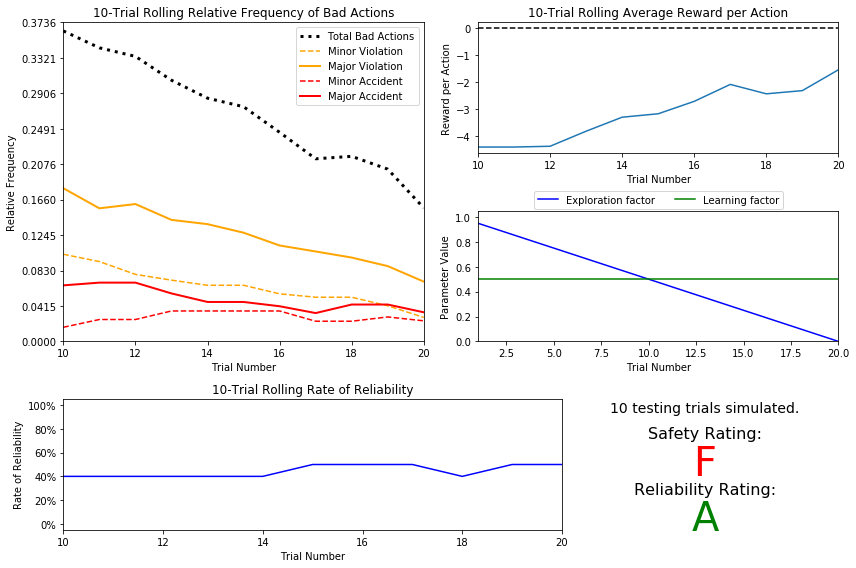

In [28]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:**

Most of the similarities can be observed from the trial 0 to 12. Total bad actions, Major violation, Minor violation, and the reward per action present similar values.

It took 20 training trials before testing. The number of trials goes according to subtract 1(the initial value of epsilon) minus 0.05 twenty times, 0.05 multiplied by 20 = 1. 

The decaying function is updated everytime the reset function is called during training. It is updated correctly subtracting 0.05 per trial.

It can be seen from the graphs that, as the number of trials increase, the number of bad actions decreases, and the average reward increase. The most notorious reduction from bad actions is 'major violations', starting with a frequency of 0.18 approximately in the first trial, and as the trials continue it had a constant decrease ending with 0.083. Then, we observe 'minor violation' also with a gradual decrease.  'Major accident' had a marginal reduction, meanwhile 'minor accident' reported a higher frequency than when started.

'Safety rating' had the same mark of 'F' as the previous agent. In contrast, 'Reliability rating' improved spectacularly with a score of 'A'.



-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the implications it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

In [4]:
import numpy as np
import random
def percent_visited(steps, states):
    visited = np.zeros(states, dtype=bool)
    for _ in range(steps):
        current_state = random.randint(0, states-1)
        visited[current_state] = True
    return sum(visited)/float(states)

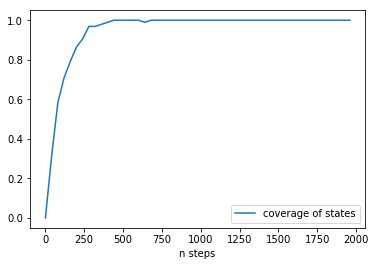

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

states = 96

n_steps = [s*40 for s in range(50)]
coverage = [percent_visited(steps, states) for steps in n_steps]
plt.plot(n_steps, coverage, label='coverage of states')
plt.xlabel('n steps')
plt.legend()

The montecarlo chart above ilustrate the number of minimum steps needed by the model to visit every state. As seen, we require more than 250 steps to learn the entire state space.

In [18]:
%run -i smartcab/agent.py


/-------------------------
| Training trial 1
\-------------------------


/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent idled at a green light with no oncoming traffic. (rewarded -4.92)
97% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent followed the waypoint left. (rewarded 2.58)
93% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent drove right instead of left. (rewarded 0.30)
90% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent attempted driving forward through a red light. (rewarded -9.80)
87% of time remaining to reach destination.

/-------------------
| Step 4 Results
\---------------

Agent attempted driving left through a red light. (rewarded -10.58)
77% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('forward', 'green', 'right', None)
Agent drove left instead of forward. (rewarded 0.92)
73% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('right', 'red', 'forward', 'forward')
Agent attempted driving right through traffic and cause a minor accident. (rewarded -19.01)
70% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('right', 'green', None, 'forward')
Agent drove forward instead of right. (rewarded 0.23)
67% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent attempted driving forward through a red light with traffic and cause a major a


Agent previous state: ('left', 'green', 'forward', None)
Agent drove forward instead of left. (rewarded 0.09)
10% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent attempted driving left through a red light. (rewarded -10.90)
5% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent followed the waypoint left. (rewarded 0.19)
0% of time remaining to reach destination.

Trial Aborted!
Agent did not reach the destination.

/-------------------------
| Training trial 4
\-------------------------


/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('right', 'green', 'right', None)
Agent idled at a green light with no oncoming traffic. (rewarded -5.19)
96% of time remaining to reach destination.

/-------------------
| Step 1 Results
\--------------

60% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('left', 'red', 'forward', 'forward')
Agent properly idled at a red light. (rewarded 1.47)
56% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('left', 'green', None, 'left')
Agent drove right instead of left. (rewarded 1.80)
52% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent attempted driving forward through a red light. (rewarded -10.00)
48% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.22)
44% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

Agent previous state: ('left

Agent previous state: ('right', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 1.18)
27% of time remaining to reach destination.

/-------------------
| Step 22 Results
\-------------------

Agent previous state: ('right', 'red', None, 'forward')
Agent attempted driving forward through a red light. (rewarded -10.38)
23% of time remaining to reach destination.

/-------------------
| Step 23 Results
\-------------------

Agent previous state: ('right', 'green', None, 'forward')
Agent idled at a green light with no oncoming traffic. (rewarded -4.34)
20% of time remaining to reach destination.

/-------------------
| Step 24 Results
\-------------------

Agent previous state: ('right', 'green', None, None)
Agent drove forward instead of right. (rewarded 0.25)
17% of time remaining to reach destination.

/-------------------
| Step 25 Results
\-------------------

Agent previous state: ('right', 'green', None, 'forward')
Agent followed the waypoint right. (rewarded 

| Step 1 Results
\-------------------

Agent previous state: ('right', 'red', None, 'forward')
Agent attempted driving left through a red light. (rewarded -10.16)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('right', 'red', None, 'left')
Agent followed the waypoint right. (rewarded 0.99)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent drove left instead of forward. (rewarded 0.56)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('right', 'green', None, None)
Agent followed the waypoint right. (rewarded 1.62)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('left', 'green', None, 'left')
Agent drove forward instead of left. (rewarded 

/-------------------
| Step 20 Results
\-------------------

Agent previous state: ('right', 'green', None, None)
Agent followed the waypoint right. (rewarded 1.22)
30% of time remaining to reach destination.

/-------------------
| Step 21 Results
\-------------------

Agent previous state: ('forward', 'green', 'forward', 'left')
Agent drove left instead of forward. (rewarded 0.77)
27% of time remaining to reach destination.

/-------------------
| Step 22 Results
\-------------------

Agent previous state: ('right', 'green', None, None)
Agent drove left instead of right. (rewarded 0.38)
23% of time remaining to reach destination.

/-------------------
| Step 23 Results
\-------------------

Agent previous state: ('left', 'red', 'forward', None)
Agent attempted driving left through a red light with traffic and cause a major accident. (rewarded -39.81)
20% of time remaining to reach destination.

/-------------------
| Step 24 Results
\-------------------

Agent previous state: ('left'

\-------------------

Agent previous state: ('right', 'red', None, None)
Agent followed the waypoint right. (rewarded 2.41)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('right', 'red', None, 'forward')
Agent attempted driving left through a red light. (rewarded -9.59)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('right', 'green', None, 'forward')
Agent drove forward instead of right. (rewarded 0.62)
50% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('right', 'green', None, None)
Agent followed the waypoint right. (rewarded 1.78)
45% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('forward', 'red', 'left', None)
Agent drove right instead of forward. (rewarded 0.17)
40% of

80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('right', 'green', None, None)
Agent drove forward instead of right. (rewarded 1.32)
76% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('right', 'red', None, 'forward')
Agent followed the waypoint right. (rewarded 1.59)
72% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 2.25)
68% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 1.50)
64% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('forward', 'red', None

| Step 18 Results
\-------------------

Agent previous state: ('left', 'green', 'left', None)
Agent drove forward instead of left. (rewarded 1.00)
5% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 0.74)
0% of time remaining to reach destination.

Trial Aborted!
Agent did not reach the destination.

/-------------------------
| Training trial 15
\-------------------------


/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('right', 'green', 'forward', None)
Agent followed the waypoint right. (rewarded 1.43)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('left', 'green', 'forward', 'left')
Agent drove right instead of left. (rewarded 0.68)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\----

Agent previous state: ('right', 'red', None, 'forward')
Agent attempted driving forward through a red light with traffic and cause a major accident. (rewarded -39.36)
40% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('right', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 0.82)
35% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('right', 'green', None, 'forward')
Agent drove forward instead of right. (rewarded 0.18)
30% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

Agent previous state: ('right', 'red', 'right', 'forward')
Agent attempted driving forward through a red light. (rewarded -10.18)
25% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

Agent previous state: ('right', 'red', None, 'forward')
Ag


Agent previous state: ('left', 'green', 'forward', None)
Agent followed the waypoint left. (rewarded 1.41)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'forward')
Agent attempted driving left through traffic and cause a minor accident. (rewarded -19.67)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('forward', 'green', 'forward', 'forward')
Agent drove right instead of forward. (rewarded 1.83)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent followed the waypoint left. (rewarded 2.24)
60% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 20
\-------------------------


/-------------------
| Step 0 Resul


Agent previous state: ('left', 'red', None, 'left')
Agent drove right instead of left. (rewarded 0.72)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('left', 'red', None, 'right')
Agent drove right instead of left. (rewarded 1.30)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('right', 'green', 'forward', 'left')
Agent idled at a green light with no oncoming traffic. (rewarded -4.93)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('right', 'red', 'forward', None)
Agent attempted driving forward through a red light with traffic and cause a major accident. (rewarded -40.22)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent properly idled a


Agent previous state: ('right', 'red', 'forward', None)
Agent attempted driving left through a red light with traffic and cause a major accident. (rewarded -39.97)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('right', 'green', None, None)
Agent drove forward instead of right. (rewarded 1.54)
50% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('right', 'green', 'forward', None)
Agent idled at a green light with no oncoming traffic. (rewarded -4.38)
45% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('right', 'red', 'forward', None)
Agent attempted driving right through traffic and cause a minor accident. (rewarded -19.15)
40% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('rig

Agent previous state: ('left', 'green', 'forward', 'forward')
Agent drove right instead of left. (rewarded 0.94)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('left', 'red', 'left', None)
Agent attempted driving left through a red light. (rewarded -9.10)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('left', 'red', 'right', None)
Agent attempted driving left through a red light. (rewarded -10.34)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent drove right instead of left. (rewarded 0.84)
50% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('right', 'green', 'forward', None)
Agent followed the waypoint right. (rewarded 2.41)
45% of time re


/-------------------
| Step 22 Results
\-------------------

Agent previous state: ('right', 'red', 'forward', None)
Agent attempted driving left through a red light with traffic and cause a major accident. (rewarded -39.23)
8% of time remaining to reach destination.

/-------------------
| Step 23 Results
\-------------------

Agent previous state: ('right', 'green', None, None)
Agent followed the waypoint right. (rewarded 1.13)
4% of time remaining to reach destination.

/-------------------
| Step 24 Results
\-------------------

Agent previous state: ('right', 'red', None, 'right')
Agent attempted driving forward through a red light with traffic and cause a major accident. (rewarded -39.64)
0% of time remaining to reach destination.

Trial Aborted!
Agent did not reach the destination.

/-------------------------
| Training trial 28
\-------------------------


/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent d

| Step 19 Results
\-------------------

Agent previous state: ('left', 'green', 'right', None)
Agent drove forward instead of left. (rewarded 0.47)
20% of time remaining to reach destination.

/-------------------
| Step 20 Results
\-------------------

Agent previous state: ('left', 'red', 'right', 'left')
Agent properly idled at a red light. (rewarded 2.30)
16% of time remaining to reach destination.

/-------------------
| Step 21 Results
\-------------------

Agent previous state: ('left', 'green', None, 'left')
Agent followed the waypoint left. (rewarded 1.40)
12% of time remaining to reach destination.

/-------------------
| Step 22 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'forward')
Agent attempted driving left through a red light. (rewarded -10.82)
8% of time remaining to reach destination.

/-------------------
| Step 23 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'forward')
Agent idled at a green light wi

| Step 31 Results
\-------------------

Agent previous state: ('right', 'green', None, 'forward')
Agent drove forward instead of right. (rewarded 0.67)
9% of time remaining to reach destination.

/-------------------
| Step 32 Results
\-------------------

Agent previous state: ('right', 'red', None, 'left')
Agent attempted driving left through a red light. (rewarded -9.10)
6% of time remaining to reach destination.

/-------------------
| Step 33 Results
\-------------------

Agent previous state: ('right', 'green', None, 'left')
Agent idled at a green light with no oncoming traffic. (rewarded -4.52)
3% of time remaining to reach destination.

/-------------------
| Step 34 Results
\-------------------

Agent previous state: ('right', 'green', None, None)
Agent followed the waypoint right. (rewarded 0.51)
0% of time remaining to reach destination.

Trial Aborted!
Agent did not reach the destination.

/-------------------------
| Training trial 31
\-------------------------


/--------

\-------------------

Agent previous state: ('forward', 'red', 'left', 'forward')
Agent properly idled at a red light. (rewarded 1.27)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'forward')
Agent drove right instead of forward. (rewarded 1.80)
80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent idled at a green light with no oncoming traffic. (rewarded -5.27)
76% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent idled at a green light with no oncoming traffic. (rewarded -5.56)
72% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('left', 'green', None, 'left')
Agent followed the waypoint lef

| Step 16 Results
\-------------------

Agent previous state: ('left', 'red', 'forward', None)
Agent attempted driving left through a red light with traffic and cause a major accident. (rewarded -39.92)
32% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

Agent previous state: ('left', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 2.37)
28% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

Agent previous state: ('left', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 2.24)
24% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

Agent previous state: ('left', 'red', None, 'forward')
Agent attempted driving forward through a red light. (rewarded -10.29)
20% of time remaining to reach destination.

/-------------------
| Step 20 Results
\-------------------

Agent previous state: ('left', 


/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('left', 'red', None, 'forward')
Agent attempted driving forward through a red light. (rewarded -10.69)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('left', 'red', None, 'forward')
Agent drove right instead of left. (rewarded 1.83)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent attempted driving left through a red light. (rewarded -9.71)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('right', 'green', None, None)
Agent idled at a green light with no oncoming traffic. (rewarded -5.48)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('right', 'green', Non


Agent previous state: ('left', 'red', 'right', 'left')
Agent attempted driving forward through a red light. (rewarded -9.51)
92% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('left', 'red', None, 'left')
Agent drove right instead of left. (rewarded 0.22)
88% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('right', 'green', 'forward', None)
Agent drove forward instead of right. (rewarded 0.43)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('right', 'green', None, None)
Agent followed the waypoint right. (rewarded 2.36)
80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('forward', 'green', 'forward', None)
Agent drove right instead of forward. (rewarded 1.87)
76% of time remaining

| Step 17 Results
\-------------------

Agent previous state: ('left', 'green', 'left', 'left')
Agent followed the waypoint left. (rewarded 0.72)
28% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 39
\-------------------------


/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent attempted driving left through a red light. (rewarded -9.36)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent attempted driving forward through a red light. (rewarded -10.39)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('right', 'red', 'left', None)
Agent properly idled at a red light. (rewarded 1.96)
85% of time remaining to reach destination.

/-------------------
| 

Agent idled at a green light with no oncoming traffic. (rewarded -5.60)
43% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

Agent previous state: ('left', 'red', 'left', None)
Agent attempted driving forward through a red light. (rewarded -9.99)
40% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

Agent previous state: ('left', 'red', 'forward', 'left')
Agent attempted driving right through traffic and cause a minor accident. (rewarded -19.21)
37% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

Agent previous state: ('left', 'red', None, 'left')
Agent attempted driving forward through a red light. (rewarded -10.15)
33% of time remaining to reach destination.

/-------------------
| Step 20 Results
\-------------------

Agent previous state: ('left', 'red', 'forward', 'left')
Agent attempted driving left through a red light with


Agent previous state: ('forward', 'red', 'forward', None)
Agent attempted driving left through a red light with traffic and cause a major accident. (rewarded -39.83)
4% of time remaining to reach destination.

/-------------------
| Step 24 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent attempted driving left through a red light. (rewarded -10.73)
0% of time remaining to reach destination.

Trial Aborted!
Agent did not reach the destination.

/-------------------------
| Training trial 42
\-------------------------


/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.03)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent attempted driving left through a red light. (rewarded -9.79)
90% of time remaining to reach destination.

/---

Agent previous state: ('forward', 'green', 'forward', None)
Agent idled at a green light with no oncoming traffic. (rewarded -4.73)
32% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

Agent previous state: ('forward', 'red', 'forward', None)
Agent attempted driving forward through a red light with traffic and cause a major accident. (rewarded -39.17)
28% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

Agent previous state: ('forward', 'red', 'forward', None)
Agent properly idled at a red light. (rewarded 0.77)
24% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent drove right instead of forward. (rewarded 0.29)
20% of time remaining to reach destination.

/-------------------
| Step 20 Results
\-------------------

Agent previous state: ('left', 'green', 'forward', None

Agent drove right instead of left. (rewarded 1.02)
50% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent drove right instead of forward. (rewarded 1.64)
45% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent attempted driving forward through a red light. (rewarded -9.49)
40% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent drove right instead of left. (rewarded 0.00)
35% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('forward', 'green', 'right', None)
Agent drove right instead of forward. (rewarded 1.12)
30% of time remaining to reach destination.

/-------------------
| Step 14 Results
\

| Step 2 Results
\-------------------

Agent previous state: ('right', 'green', 'forward', None)
Agent followed the waypoint right. (rewarded 2.03)
90% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('right', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 0.83)
87% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('right', 'red', None, 'forward')
Agent attempted driving forward through a red light. (rewarded -9.72)
83% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('right', 'red', None, 'forward')
Agent attempted driving forward through a red light. (rewarded -10.29)
80% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('right', 'green', None, 'forward')
Agent idled 


/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent idled at a green light with no oncoming traffic. (rewarded -5.16)
60% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'right')
Agent drove right instead of forward. (rewarded 0.98)
56% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('left', 'red', None, 'left')
Agent drove right instead of left. (rewarded 0.93)
52% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('right', 'red', None, 'right')
Agent properly idled at a red light. (rewarded 0.36)
48% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('right', 'red', 'forward', None)
Agent atte

30% of time remaining to reach destination.

/-------------------
| Step 21 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent attempted driving left through a red light. (rewarded -9.69)
27% of time remaining to reach destination.

/-------------------
| Step 22 Results
\-------------------

Agent previous state: ('forward', 'green', 'forward', None)
Agent drove right instead of forward. (rewarded -0.47)
23% of time remaining to reach destination.

/-------------------
| Step 23 Results
\-------------------

Agent previous state: ('left', 'green', 'right', 'forward')
Agent drove forward instead of left. (rewarded 1.25)
20% of time remaining to reach destination.

/-------------------
| Step 24 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent followed the waypoint left. (rewarded 0.59)
17% of time remaining to reach destination.

/-------------------
| Step 25 Results
\-------------------

Agent previous state

| Step 5 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent idled at a green light with no oncoming traffic. (rewarded -4.67)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent drove forward instead of left. (rewarded 1.55)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('left', 'green', None, 'left')
Agent followed the waypoint left. (rewarded 1.67)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('forward', 'red', 'right', None)
Agent attempted driving forward through a red light. (rewarded -10.67)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent attempted driving left

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent attempted driving left through a red light. (rewarded -9.34)
83% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('left', 'green', 'right', None)
Agent drove right instead of left. (rewarded 1.70)
80% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('left', 'red', 'forward', 'right')
Agent properly idled at a red light. (rewarded 2.24)
77% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('left', 'red', 'left', None)
Agent attempted driving forward through a red light. (rewarded -9.13)
73% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly

Agent attempted driving forward through a red light with traffic and cause a major accident. (rewarded -40.07)
45% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent properly idled at a red light. (rewarded 0.50)
40% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('right', 'red', 'left', 'right')
Agent attempted driving left through a red light with traffic and cause a major accident. (rewarded -39.49)
35% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('right', 'green', None, 'left')
Agent idled at a green light with no oncoming traffic. (rewarded -5.53)
30% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

Agent previous state: ('right', 'green', None, None)
Agent followed th

/-------------------
| Step 28 Results
\-------------------

Agent previous state: ('right', 'green', 'left', None)
Agent drove forward instead of right. (rewarded 0.81)
3% of time remaining to reach destination.

/-------------------
| Step 29 Results
\-------------------

Agent previous state: ('forward', 'red', 'forward', None)
Agent attempted driving forward through a red light with traffic and cause a major accident. (rewarded -39.33)
0% of time remaining to reach destination.

Trial Aborted!
Agent did not reach the destination.

/-------------------------
| Training trial 57
\-------------------------


/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('forward', 'green', 'right', None)
Agent drove left instead of forward. (rewarded 0.48)
96% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('right', 'red', 'left', 'left')
Agent attempted driving forward through a red light.


Agent previous state: ('left', 'green', None, 'right')
Agent drove forward instead of left. (rewarded 0.98)
40% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

Agent previous state: ('forward', 'green', 'right', None)
Agent drove left instead of forward. (rewarded 0.03)
36% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

Agent previous state: ('right', 'red', None, 'right')
Agent attempted driving left through a red light with traffic and cause a major accident. (rewarded -39.72)
32% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

Agent previous state: ('right', 'green', None, 'right')
Agent attempted driving left through traffic and cause a minor accident. (rewarded -19.05)
28% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

Agent previous state: ('right', 'green', None, 

| Step 7 Results
\-------------------

Agent previous state: ('left', 'green', 'forward', None)
Agent idled at a green light with no oncoming traffic. (rewarded -4.52)
68% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('left', 'green', 'forward', None)
Agent followed the waypoint left. (rewarded 1.96)
64% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'forward')
Agent attempted driving left through traffic and cause a minor accident. (rewarded -20.95)
60% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'forward')
Agent attempted driving left through traffic and cause a minor accident. (rewarded -19.08)
56% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

A

\-------------------

Agent previous state: ('left', 'green', 'left', None)
Agent drove right instead of left. (rewarded 0.03)
40% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('right', 'green', 'left', None)
Agent drove left instead of right. (rewarded 0.65)
35% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.83)
30% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

Agent previous state: ('left', 'red', 'right', None)
Agent properly idled at a red light. (rewarded 1.42)
25% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

Agent previous state: ('left', 'red', 'left', None)
Agent attempted driving forward through a red light. (rewarded -10.48)
20% of time

\-------------------

Agent previous state: ('right', 'red', None, None)
Agent followed the waypoint right. (rewarded 2.30)
72% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('right', 'green', None, None)
Agent idled at a green light with no oncoming traffic. (rewarded -4.29)
68% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('right', 'green', None, None)
Agent drove left instead of right. (rewarded 1.43)
64% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'forward')
Agent attempted driving forward through a red light. (rewarded -10.97)
60% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'forward')
Agent drove right instead of forward.

Agent drove right instead of left. (rewarded 0.34)
16% of time remaining to reach destination.

/-------------------
| Step 21 Results
\-------------------

Agent previous state: ('right', 'red', 'forward', None)
Agent attempted driving left through a red light with traffic and cause a major accident. (rewarded -39.52)
12% of time remaining to reach destination.

/-------------------
| Step 22 Results
\-------------------

Agent previous state: ('right', 'red', 'left', None)
Agent followed the waypoint right. (rewarded 0.80)
8% of time remaining to reach destination.

/-------------------
| Step 23 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.14)
4% of time remaining to reach destination.

/-------------------
| Step 24 Results
\-------------------

Agent previous state: ('right', 'red', 'left', 'forward')
Agent properly idled at a red light. (rewarded -0.59)
0% of time remaining to reach destination.


\-------------------

Agent previous state: ('right', 'green', None, 'right')
Agent attempted driving left through traffic and cause a minor accident. (rewarded -20.10)
32% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent followed the waypoint right. (rewarded 2.27)
28% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

Agent previous state: ('forward', 'red', 'forward', 'right')
Agent properly idled at a red light. (rewarded 1.77)
24% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 1.54)
20% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 69
\-------------------------


/------------------


Agent previous state: ('forward', 'red', None, 'left')
Agent attempted driving forward through a red light. (rewarded -9.82)
20% of time remaining to reach destination.

/-------------------
| Step 24 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 0.58)
17% of time remaining to reach destination.

/-------------------
| Step 25 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'left')
Agent idled at a green light with no oncoming traffic. (rewarded -5.68)
13% of time remaining to reach destination.

/-------------------
| Step 26 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent drove left instead of forward. (rewarded -0.11)
10% of time remaining to reach destination.

/-------------------
| Step 27 Results
\-------------------

Agent previous state: ('right', 'green', None, 'left')
Agent followed the waypoint right. (rewarded 1.97

Agent drove left instead of right. (rewarded 0.30)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'left')
Agent drove right instead of forward. (rewarded 0.95)
50% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('left', 'green', 'left', None)
Agent idled at a green light with no oncoming traffic. (rewarded -5.67)
45% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('left', 'green', 'left', None)
Agent drove right instead of left. (rewarded 0.62)
40% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('right', 'red', None, 'left')
Agent properly idled at a red light. (rewarded -0.12)
35% of time remaining to reach destination.

/-------------------
| Step 13 R

Agent previous state: ('forward', 'red', 'forward', 'forward')
Agent attempted driving forward through a red light with traffic and cause a major accident. (rewarded -40.19)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('forward', 'red', 'forward', 'forward')
Agent attempted driving left through a red light with traffic and cause a major accident. (rewarded -39.73)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('forward', 'red', 'right', 'left')
Agent attempted driving forward through a red light. (rewarded -10.24)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('forward', 'red', 'forward', 'left')
Agent attempted driving left through a red light with traffic and cause a major accident. (rewarded -40.65)
70% of time remaining to reach destination.

| Step 21 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent attempted driving forward through a red light. (rewarded -9.61)
37% of time remaining to reach destination.

/-------------------
| Step 22 Results
\-------------------

Agent previous state: ('left', 'green', None, 'left')
Agent idled at a green light with no oncoming traffic. (rewarded -4.54)
34% of time remaining to reach destination.

/-------------------
| Step 23 Results
\-------------------

Agent previous state: ('left', 'green', None, 'left')
Agent drove forward instead of left. (rewarded -0.35)
31% of time remaining to reach destination.

/-------------------
| Step 24 Results
\-------------------

Agent previous state: ('forward', 'green', 'forward', 'left')
Agent drove left instead of forward. (rewarded 0.09)
29% of time remaining to reach destination.

/-------------------
| Step 25 Results
\-------------------

Agent previous state: ('right', 'green', None, None)
Agent drove le

90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent attempted driving forward through a red light. (rewarded -10.60)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent attempted driving forward through a red light. (rewarded -9.22)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent attempted driving left through a red light. (rewarded -9.29)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent followed the waypoint right. (rewarded 2.46)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previo

| Step 19 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'forward')
Agent attempted driving forward through a red light. (rewarded -9.58)
0% of time remaining to reach destination.

Trial Aborted!
Agent did not reach the destination.

/-------------------------
| Training trial 80
\-------------------------


/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('forward', 'green', 'forward', 'right')
Agent drove right instead of forward. (rewarded 0.34)
96% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('left', 'red', 'right', None)
Agent properly idled at a red light. (rewarded 2.28)
92% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent attempted driving left through a red light. (rewarded -10.43)
88% of time remaining to reach destination.

/--


Agent previous state: ('left', 'green', 'forward', 'forward')
Agent drove right instead of left. (rewarded 1.13)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('right', 'green', None, None)
Agent idled at a green light with no oncoming traffic. (rewarded -4.08)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('right', 'green', None, None)
Agent followed the waypoint right. (rewarded 2.75)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('right', 'red', 'left', None)
Agent followed the waypoint right. (rewarded 1.54)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'left')
Agent followed the waypoint forward. (rewarded 1.62)
75% of time remaining t

90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left')
Agent drove right instead of forward. (rewarded 1.62)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('left', 'green', 'forward', None)
Agent followed the waypoint left. (rewarded 1.45)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent drove right instead of forward. (rewarded 0.52)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent drove right instead of left. (rewarded 1.22)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('right', 'red', 'left', None

\-------------------

Agent previous state: ('left', 'green', None, None)
Agent drove right instead of left. (rewarded 1.96)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 1.95)
80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent attempted driving forward through a red light. (rewarded -10.21)
76% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent drove right instead of forward. (rewarded 1.43)
72% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('left', 'green', 'right', None)
Agent followed the waypoint left. (rewarded 2.14)
68% of time

| Step 10 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent idled at a green light with no oncoming traffic. (rewarded -4.36)
45% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent drove right instead of left. (rewarded 0.06)
40% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent attempted driving forward through a red light. (rewarded -9.86)
35% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent attempted driving forward through a red light. (rewarded -9.67)
30% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent attempted 

Agent previous state: ('left', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 2.07)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('left', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 2.70)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('left', 'red', None, 'left')
Agent attempted driving left through a red light. (rewarded -9.12)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('left', 'green', None, 'left')
Agent drove forward instead of left. (rewarded 1.49)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('left', 'red', 'left', 'forward')
Agent drove right instead of left. (rewarded 0.21)
65% of time remaining to reach desti

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('left', 'green', None, 'forward')
Agent attempted driving left through traffic and cause a minor accident. (rewarded -20.00)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('left', 'green', 'left', None)
Agent followed the waypoint left. (rewarded 2.82)
65% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 93
\-------------------------


/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 2.16)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left')
Agent attempted driving forward through a red light. (rewarded -9.13)
90% of time rem

/-------------------
| Step 22 Results
\-------------------

Agent previous state: ('left', 'green', None, 'left')
Agent followed the waypoint left. (rewarded 1.04)
23% of time remaining to reach destination.

/-------------------
| Step 23 Results
\-------------------

Agent previous state: ('right', 'green', 'left', None)
Agent followed the waypoint right. (rewarded 1.98)
20% of time remaining to reach destination.

/-------------------
| Step 24 Results
\-------------------

Agent previous state: ('forward', 'green', 'right', None)
Agent followed the waypoint forward. (rewarded 2.12)
17% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 95
\-------------------------


/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('forward', 'red', 'forward', 'forward')
Agent properly idled at a red light. (rewarded 2.06)
96% of time remaining to reach destination.

/--------------

\-------------------

Agent previous state: ('left', 'red', 'forward', None)
Agent attempted driving forward through a red light with traffic and cause a major accident. (rewarded -40.24)
44% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

Agent previous state: ('left', 'red', 'forward', 'forward')
Agent properly idled at a red light. (rewarded 1.45)
40% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

Agent previous state: ('left', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 1.12)
36% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

Agent previous state: ('left', 'green', None, 'forward')
Agent idled at a green light with no oncoming traffic. (rewarded -4.64)
32% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

Agent previous state: ('left', 'green'

76% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('left', 'red', 'forward', 'left')
Agent properly idled at a red light. (rewarded 2.01)
72% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('left', 'green', None, 'left')
Agent followed the waypoint left. (rewarded 1.53)
68% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'forward')
Agent attempted driving left through a red light. (rewarded -9.69)
64% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('forward', 'green', 'left', 'forward')
Agent idled at a green light with no oncoming traffic. (rewarded -5.87)
60% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

A

/-------------------
| Step 17 Results
\-------------------

Agent previous state: ('left', 'green', 'right', None)
Agent idled at a green light with no oncoming traffic. (rewarded -5.14)
10% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent followed the waypoint left. (rewarded 2.18)
5% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

Agent previous state: ('right', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 0.10)
0% of time remaining to reach destination.

Trial Aborted!
Agent did not reach the destination.

/-------------------------
| Training trial 100
\-------------------------


/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('left', 'green', 'forward', 'left')
Agent idled at a green light with no oncoming traffic. (rewarded -5.52)
97% of time remaining to 

65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('right', 'green', 'forward', None)
Agent followed the waypoint right. (rewarded 1.92)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('right', 'red', None, 'right')
Agent attempted driving left through a red light with traffic and cause a major accident. (rewarded -39.91)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('right', 'green', None, None)
Agent drove left instead of right. (rewarded 0.79)
50% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('forward', 'red', 'right', None)
Agent attempted driving forward through a red light. (rewarded -10.68)
45% of time remaining to reach destination.

/-------------------
| Step 11 R


Agent previous state: ('right', 'green', 'right', 'forward')
Agent attempted driving left through traffic and cause a minor accident. (rewarded -19.30)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent followed the waypoint right. (rewarded 1.22)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('right', 'red', None, 'left')
Agent followed the waypoint right. (rewarded 1.06)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 1.36)
50% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent attempted driving forward through a red light with traff

Agent previous state: ('left', 'red', None, None)
Agent attempted driving forward through a red light. (rewarded -9.95)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent followed the waypoint left. (rewarded 1.62)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('forward', 'red', 'forward', None)
Agent attempted driving left through a red light with traffic and cause a major accident. (rewarded -40.89)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.49)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent drove right instead of forw


/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('left', 'red', 'left', None)
Agent properly idled at a red light. (rewarded 1.79)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('left', 'red', 'right', None)
Agent attempted driving forward through a red light. (rewarded -10.97)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent attempted driving left through a red light. (rewarded -9.58)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('left', 'green', 'forward', None)
Agent followed the waypoint left. (rewarded 2.74)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('left', 'green', None, 'left')
Agent drove 


Agent previous state: ('forward', 'green', None, None)
Agent idled at a green light with no oncoming traffic. (rewarded -4.20)
8% of time remaining to reach destination.

/-------------------
| Step 23 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 1.93)
4% of time remaining to reach destination.

/-------------------
| Step 24 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 1.19)
0% of time remaining to reach destination.

Trial Aborted!
Agent did not reach the destination.

/-------------------------
| Training trial 110
\-------------------------


/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('right', 'red', 'right', 'right')
Agent properly idled at a red light. (rewarded 0.71)
96% of time remaining to reach destination.

/-------------------
| Step 1 Results
\------------------


Agent previous state: ('forward', 'green', None, None)
Agent drove left instead of forward. (rewarded 0.95)
53% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

Agent previous state: ('right', 'red', None, 'forward')
Agent attempted driving left through a red light. (rewarded -10.94)
50% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

Agent previous state: ('right', 'red', None, 'forward')
Agent attempted driving forward through a red light. (rewarded -9.21)
47% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

Agent previous state: ('right', 'green', None, 'forward')
Agent idled at a green light with no oncoming traffic. (rewarded -4.11)
43% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

Agent previous state: ('right', 'green', 'forward', None)
Agent drove forward instead o


Agent previous state: ('right', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.30)
12% of time remaining to reach destination.

/-------------------
| Step 22 Results
\-------------------

Agent previous state: ('right', 'red', 'forward', None)
Agent properly idled at a red light. (rewarded 0.40)
8% of time remaining to reach destination.

/-------------------
| Step 23 Results
\-------------------

Agent previous state: ('right', 'red', 'forward', None)
Agent properly idled at a red light. (rewarded -0.14)
4% of time remaining to reach destination.

/-------------------
| Step 24 Results
\-------------------

Agent previous state: ('right', 'red', None, 'right')
Agent properly idled at a red light. (rewarded 0.79)
0% of time remaining to reach destination.

Trial Aborted!
Agent did not reach the destination.

/-------------------------
| Training trial 113
\-------------------------


/-------------------
| Step 0 Results
\-------------------

Agent previous stat

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('left', 'green', 'left', None)
Agent drove forward instead of left. (rewarded 0.35)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('left', 'green', 'forward', 'left')
Agent followed the waypoint left. (rewarded 2.84)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('left', 'green', 'left', None)
Agent drove forward instead of left. (rewarded 1.81)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('left', 'red', None, 'left')
Agent attempted driving left through a red light. (rewarded -10.54)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('left', 'green', None, 'left')
Agent idled at a green 

Agent previous state: ('right', 'green', 'forward', None)
Agent idled at a green light with no oncoming traffic. (rewarded -5.57)
30% of time remaining to reach destination.

/-------------------
| Step 21 Results
\-------------------

Agent previous state: ('right', 'red', 'forward', 'forward')
Agent attempted driving forward through a red light with traffic and cause a major accident. (rewarded -39.92)
27% of time remaining to reach destination.

/-------------------
| Step 22 Results
\-------------------

Agent previous state: ('right', 'red', None, 'forward')
Agent attempted driving forward through a red light. (rewarded -9.20)
23% of time remaining to reach destination.

/-------------------
| Step 23 Results
\-------------------

Agent previous state: ('right', 'red', None, 'left')
Agent attempted driving forward through a red light. (rewarded -9.53)
20% of time remaining to reach destination.

/-------------------
| Step 24 Results
\-------------------

Agent previous state: ('r

Agent previous state: ('left', 'red', 'right', None)
Agent drove right instead of left. (rewarded 1.55)
70% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left')
Agent drove right instead of forward. (rewarded 1.75)
67% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('left', 'red', 'right', None)
Agent properly idled at a red light. (rewarded 1.91)
63% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent attempted driving forward through a red light. (rewarded -9.75)
60% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('left', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 1.89)
57% of time remaining to reach de

| Step 15 Results
\-------------------

Agent previous state: ('forward', 'red', 'right', None)
Agent attempted driving left through a red light. (rewarded -10.51)
47% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent drove right instead of forward. (rewarded 0.84)
43% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

Agent previous state: ('left', 'red', 'left', None)
Agent drove right instead of left. (rewarded -0.10)
40% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

Agent previous state: ('right', 'green', 'right', 'forward')
Agent followed the waypoint right. (rewarded 1.92)
37% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

Agent previous state: ('right', 'green', None, 'left')
Agent followed the waypoint righ

Agent attempted driving forward through a red light. (rewarded -10.62)
0% of time remaining to reach destination.

Trial Aborted!
Agent did not reach the destination.

/-------------------------
| Training trial 121
\-------------------------


/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 1.43)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'right')
Agent attempted driving left through a red light with traffic and cause a major accident. (rewarded -40.90)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('forward', 'red', 'right', None)
Agent attempted driving forward through a red light. (rewarded -9.18)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\---

Agent previous state: ('left', 'red', None, None)
Agent drove right instead of left. (rewarded -0.41)
17% of time remaining to reach destination.

/-------------------
| Step 25 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent idled at a green light with no oncoming traffic. (rewarded -4.65)
13% of time remaining to reach destination.

/-------------------
| Step 26 Results
\-------------------

Agent previous state: ('left', 'red', None, 'left')
Agent drove right instead of left. (rewarded 0.62)
10% of time remaining to reach destination.

/-------------------
| Step 27 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent attempted driving forward through a red light. (rewarded -9.08)
7% of time remaining to reach destination.

/-------------------
| Step 28 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent attempted driving left through a red light. (rewarded -9.70)
3% of tim

| Step 7 Results
\-------------------

Agent previous state: ('left', 'green', None, 'right')
Agent drove forward instead of left. (rewarded 0.38)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('left', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 1.19)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('left', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 2.15)
50% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('left', 'red', None, 'forward')
Agent attempted driving forward through a red light. (rewarded -9.88)
45% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('left', 'green', None, 'forward')
Agent attempted driving left thro

Agent previous state: ('forward', 'red', 'left', None)
Agent drove right instead of forward. (rewarded 0.08)
53% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

Agent previous state: ('left', 'green', 'left', None)
Agent drove right instead of left. (rewarded 1.30)
50% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

Agent previous state: ('right', 'green', None, None)
Agent drove forward instead of right. (rewarded 0.93)
47% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent followed the waypoint right. (rewarded 1.66)
43% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.67)
40% of time remaining to reach destination.

/----


/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('left', 'green', 'right', None)
Agent idled at a green light with no oncoming traffic. (rewarded -4.29)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent drove forward instead of left. (rewarded 1.80)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('left', 'green', None, 'left')
Agent drove right instead of left. (rewarded 1.31)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('forward', 'green', 'forward', 'right')
Agent followed the waypoint forward. (rewarded 1.84)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('forward', 'green', 'forward', None)
Agent 

32% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'left')
Agent followed the waypoint forward. (rewarded 0.73)
28% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

Agent previous state: ('forward', 'red', 'left', None)
Agent properly idled at a red light. (rewarded 1.04)
24% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent attempted driving left through a red light. (rewarded -9.15)
20% of time remaining to reach destination.

/-------------------
| Step 20 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 0.98)
16% of time remaining to reach destination.

/-------------------
| Step 21 Results
\-------------------

Agent previous state: ('fo

\-------------------

Agent previous state: ('forward', 'red', 'right', None)
Agent attempted driving left through a red light. (rewarded -10.69)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent attempted driving forward through a red light. (rewarded -10.90)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'right')
Agent drove right instead of forward. (rewarded -0.01)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('left', 'red', 'forward', 'left')
Agent attempted driving right through traffic and cause a minor accident. (rewarded -20.22)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('left', 'red', 'forward', '


/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('left', 'red', None, 'left')
Agent attempted driving left through a red light. (rewarded -9.76)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('left', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 2.00)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('left', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 1.13)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('left', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 1.30)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('left', 'green', None, 'left')
Agent drove forward instead of 

Agent previous state: ('right', 'green', None, None)
Agent idled at a green light with no oncoming traffic. (rewarded -5.79)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('right', 'green', None, 'left')
Agent followed the waypoint right. (rewarded 1.46)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('forward', 'green', 'forward', None)
Agent drove left instead of forward. (rewarded 0.28)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('right', 'red', 'right', None)
Agent attempted driving left through a red light. (rewarded -9.49)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('right', 'green', None, None)
Agent followed the waypoint right. (rewarded 1.89)
70% of time

| Step 23 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent followed the waypoint left. (rewarded 0.38)
4% of time remaining to reach destination.

/-------------------
| Step 24 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent idled at a green light with no oncoming traffic. (rewarded -4.54)
0% of time remaining to reach destination.

Trial Aborted!
Agent did not reach the destination.

/-------------------------
| Training trial 137
\-------------------------


/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.74)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent drove right instead of left. (rewarded 0.38)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results


/-------------------
| Step 14 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent drove right instead of forward. (rewarded 1.66)
50% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent followed the waypoint left. (rewarded 2.60)
47% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

Agent previous state: ('left', 'red', 'forward', 'left')
Agent attempted driving left through a red light with traffic and cause a major accident. (rewarded -40.50)
43% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

Agent previous state: ('left', 'red', None, 'left')
Agent drove right instead of left. (rewarded 0.18)
40% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

Agent previous state: ('right', 'red

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent attempted driving left through a red light. (rewarded -10.72)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent drove right instead of left. (rewarded 1.43)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'right')
Agent followed the waypoint forward. (rewarded 2.41)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent attempted driving forward through a red light. (rewarded -10.78)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properl

Agent attempted driving left through a red light. (rewarded -9.82)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent drove right instead of forward. (rewarded 1.17)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('left', 'green', None, 'left')
Agent followed the waypoint left. (rewarded 1.97)
50% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 2.65)
45% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('forward', 'red', 'forward', None)
Agent attempted driving left through a red light with traffic and cause a major accident. (rewarded -39.65)
40% of time remaining to r


Agent previous state: ('forward', 'red', None, None)
Agent attempted driving forward through a red light. (rewarded -9.89)
0% of time remaining to reach destination.

Trial Aborted!
Agent did not reach the destination.

/-------------------------
| Training trial 146
\-------------------------


/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent attempted driving left through a red light. (rewarded -9.84)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('left', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 1.95)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('left', 'red', None, 'forward')
Agent attempted driving forward through a red light. (rewarded -10.25)
85% of time remaining to reach destination.

/-------------------
| Step 3 Result

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent attempted driving left through a red light. (rewarded -9.40)
92% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent attempted driving forward through a red light. (rewarded -10.09)
88% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.23)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent drove left instead of forward. (rewarded 1.82)
80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('right', 'green', 'forward', None)
Agen

/-------------------
| Step 15 Results
\-------------------

Agent previous state: ('right', 'red', 'forward', 'left')
Agent properly idled at a red light. (rewarded 1.27)
20% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

Agent previous state: ('right', 'green', None, 'left')
Agent drove left instead of right. (rewarded -0.46)
15% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent followed the waypoint left. (rewarded 1.79)
10% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

Agent previous state: ('right', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 0.85)
5% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

Agent previous state: ('right', 'green', 'right', 'left')
Agent idled at a green light wit

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('left', 'red', None, 'forward')
Agent drove right instead of left. (rewarded 0.97)
88% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('forward', 'green', 'forward', None)
Agent followed the waypoint forward. (rewarded 1.93)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 2.77)
80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('forward', 'red', 'forward', 'left')
Agent properly idled at a red light. (rewarded 2.25)
76% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'left')
Agent followed the wayp

\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.85)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('left', 'red', 'left', 'left')
Agent properly idled at a red light. (rewarded 1.02)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('left', 'green', None, 'left')
Agent drove right instead of left. (rewarded 0.78)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 2.80)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent attempted driving left through a red light. (rewarded -10.99)
50% of time re

| Step 24 Results
\-------------------

Agent previous state: ('left', 'green', None, 'left')
Agent idled at a green light with no oncoming traffic. (rewarded -5.50)
29% of time remaining to reach destination.

/-------------------
| Step 25 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.09)
26% of time remaining to reach destination.

/-------------------
| Step 26 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent attempted driving left through a red light. (rewarded -9.93)
23% of time remaining to reach destination.

/-------------------
| Step 27 Results
\-------------------

Agent previous state: ('left', 'green', 'right', 'right')
Agent attempted driving left through traffic and cause a minor accident. (rewarded -20.15)
20% of time remaining to reach destination.

/-------------------
| Step 28 Results
\-------------------

Agent previous state: ('left', 'green', '

Agent properly idled at a red light. (rewarded 2.56)
60% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('forward', 'red', 'forward', 'left')
Agent properly idled at a red light. (rewarded 2.77)
56% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'left')
Agent followed the waypoint forward. (rewarded 2.35)
52% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent properly idled at a red light. (rewarded 0.18)
48% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('right', 'green', None, None)
Agent drove left instead of right. (rewarded 0.14)
44% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------

\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 1.86)
94% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('forward', 'red', 'left', 'forward')
Agent attempted driving forward through a red light. (rewarded -9.84)
91% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('forward', 'green', 'left', 'forward')
Agent followed the waypoint forward. (rewarded 2.67)
89% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('forward', 'red', 'forward', 'forward')
Agent attempted driving left through a red light with traffic and cause a major accident. (rewarded -40.51)
86% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('forward', 

Agent previous state: ('right', 'green', None, 'left')
Agent followed the waypoint right. (rewarded 0.89)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('right', 'red', 'right', None)
Agent attempted driving left through a red light. (rewarded -10.85)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent attempted driving left through a red light. (rewarded -9.81)
50% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('right', 'green', None, None)
Agent drove left instead of right. (rewarded 0.56)
45% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('right', 'green', 'left', 'forward')
Agent idled at a green light with no oncoming traffic. (rewarded -5.


/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('left', 'green', None, 'left')
Agent drove forward instead of left. (rewarded -0.03)
68% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('left', 'green', None, 'forward')
Agent idled at a green light with no oncoming traffic. (rewarded -4.89)
64% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent attempted driving left through a red light. (rewarded -10.92)
60% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('left', 'red', 'right', None)
Agent properly idled at a red light. (rewarded 2.07)
56% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agen


/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 2.11)
68% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.28)
64% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'right')
Agent idled at a green light with no oncoming traffic. (rewarded -5.94)
60% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent idled at a green light with no oncoming traffic. (rewarded -4.58)
56% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('forward', 'red', None,


/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 2.04)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'left')
Agent drove left instead of forward. (rewarded 0.96)
50% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent followed the waypoint right. (rewarded 2.63)
45% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('left', 'green', 'forward', 'left')
Agent followed the waypoint left. (rewarded 2.51)
40% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('forward', 'red', 'left', 'left')
Agent attempted driving forwar


/-------------------
| Step 19 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 0.70)
20% of time remaining to reach destination.

/-------------------
| Step 20 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'forward')
Agent attempted driving forward through a red light. (rewarded -10.11)
16% of time remaining to reach destination.

/-------------------
| Step 21 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'forward')
Agent attempted driving left through traffic and cause a minor accident. (rewarded -19.13)
12% of time remaining to reach destination.

/-------------------
| Step 22 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent drove right instead of forward. (rewarded -0.71)
8% of time remaining to reach destination.

/-------------------
| Step 23 Results
\-------------------

Agent previous

\-------------------

Agent previous state: ('left', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 1.00)
0% of time remaining to reach destination.

Trial Aborted!
Agent did not reach the destination.

/-------------------------
| Training trial 171
\-------------------------


/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('right', 'red', 'right', 'left')
Agent followed the waypoint right. (rewarded 1.13)
96% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent followed the waypoint right. (rewarded 2.48)
92% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent drove left instead of forward. (rewarded 0.09)
88% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent p

44% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

Agent previous state: ('left', 'red', 'left', 'left')
Agent properly idled at a red light. (rewarded 1.04)
40% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

Agent previous state: ('left', 'red', 'left', 'left')
Agent properly idled at a red light. (rewarded 2.63)
36% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

Agent previous state: ('left', 'green', None, 'left')
Agent drove right instead of left. (rewarded 1.55)
32% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

Agent previous state: ('left', 'green', 'left', None)
Agent followed the waypoint left. (rewarded 1.00)
28% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

Agent previous state: ('left', 'red', None, Non

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent followed the waypoint right. (rewarded 1.59)
56% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent followed the waypoint right. (rewarded 2.78)
52% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent followed the waypoint left. (rewarded 2.69)
48% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 178
\-------------------------


/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent attempted driving forward through a red light. (rewarded -10.62)
96% of time remaining to reach destination.

/-------------------
| 

\-------------------

Agent previous state: ('right', 'red', 'forward', 'forward')
Agent properly idled at a red light. (rewarded 1.53)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('right', 'red', None, 'forward')
Agent attempted driving left through a red light. (rewarded -10.61)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('right', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 0.20)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('right', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 0.16)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('right', 'green', 'left', 'forward')
Agent attempted driving left through traff


Agent previous state: ('left', 'red', 'forward', None)
Agent properly idled at a red light. (rewarded 1.45)
68% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('left', 'red', None, 'forward')
Agent drove right instead of left. (rewarded 1.65)
64% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.84)
60% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('left', 'red', 'forward', None)
Agent properly idled at a red light. (rewarded 2.27)
56% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent followed the waypoint left. (rewarded 0.93)
52% of time remaining to reach destination.

/----

| Step 26 Results
\-------------------

Agent previous state: ('left', 'red', 'forward', None)
Agent attempted driving right through traffic and cause a minor accident. (rewarded -19.85)
10% of time remaining to reach destination.

/-------------------
| Step 27 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.85)
7% of time remaining to reach destination.

/-------------------
| Step 28 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.89)
3% of time remaining to reach destination.

/-------------------
| Step 29 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.33)
0% of time remaining to reach destination.

Trial Aborted!
Agent did not reach the destination.

/-------------------------
| Training trial 184
\-------------------------


/-------------

/-------------------
| Step 23 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent followed the waypoint left. (rewarded 1.45)
20% of time remaining to reach destination.

/-------------------
| Step 24 Results
\-------------------

Agent previous state: ('forward', 'red', 'left', None)
Agent properly idled at a red light. (rewarded 1.01)
17% of time remaining to reach destination.

/-------------------
| Step 25 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 1.04)
13% of time remaining to reach destination.

/-------------------
| Step 26 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent attempted driving left through a red light. (rewarded -10.67)
10% of time remaining to reach destination.

/-------------------
| Step 27 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent followed the wa

Agent properly idled at a red light. (rewarded 1.85)
6% of time remaining to reach destination.

/-------------------
| Step 33 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 1.80)
3% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 187
\-------------------------


/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('right', 'green', None, None)
Agent drove forward instead of right. (rewarded 0.60)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('right', 'green', 'forward', None)
Agent idled at a green light with no oncoming traffic. (rewarded -4.57)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('right', 'green', 'forward', 'righ

Agent previous state: ('forward', 'red', 'forward', None)
Agent attempted driving forward through a red light with traffic and cause a major accident. (rewarded -39.26)
87% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('forward', 'red', 'left', None)
Agent properly idled at a red light. (rewarded 2.06)
83% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent drove left instead of forward. (rewarded 1.15)
80% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('right', 'green', None, None)
Agent idled at a green light with no oncoming traffic. (rewarded -4.40)
77% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('right', 'green', None, None)
Agent followed th

Agent followed the waypoint right. (rewarded 2.12)
3% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 191
\-------------------------


/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent drove left instead of forward. (rewarded 0.20)
97% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('right', 'red', 'right', 'right')
Agent followed the waypoint right. (rewarded 2.68)
93% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('forward', 'red', 'left', 'left')
Agent properly idled at a red light. (rewarded 2.18)
90% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left')
Agent properly idled at

Agent properly idled at a red light. (rewarded 1.04)
88% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('left', 'red', None, 'forward')
Agent drove right instead of left. (rewarded 1.31)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('forward', 'red', 'forward', None)
Agent properly idled at a red light. (rewarded 1.54)
80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 2.36)
76% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('forward', 'red', 'left', 'forward')
Agent attempted driving forward through a red light with traffic and cause a major accident. (rewarded -39.25)
72% of time remaining to reach 


/-------------------
| Step 17 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent followed the waypoint right. (rewarded 1.49)
28% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

Agent previous state: ('left', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 2.14)
24% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

Agent previous state: ('left', 'red', 'forward', 'left')
Agent properly idled at a red light. (rewarded 1.20)
20% of time remaining to reach destination.

/-------------------
| Step 20 Results
\-------------------

Agent previous state: ('left', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 2.13)
16% of time remaining to reach destination.

/-------------------
| Step 21 Results
\-------------------

Agent previous state: ('left', 'green', None, 'left')
Agent idled at a green light with no o


Agent previous state: ('left', 'red', 'left', None)
Agent attempted driving left through a red light. (rewarded -9.08)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('left', 'green', 'right', 'forward')
Agent drove forward instead of left. (rewarded 1.24)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('left', 'red', None, 'right')
Agent properly idled at a red light. (rewarded 2.56)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('left', 'red', 'right', None)
Agent properly idled at a red light. (rewarded 2.70)
50% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.35)
45% of time remaining to reach 

Agent previous state: ('left', 'red', None, 'forward')
Agent attempted driving left through a red light. (rewarded -10.64)
0% of time remaining to reach destination.

Trial Aborted!
Agent did not reach the destination.

/-------------------------
| Training trial 199
\-------------------------


/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.38)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'forward')
Agent drove right instead of forward. (rewarded 0.55)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('left', 'green', 'forward', None)
Agent drove forward instead of left. (rewarded 1.32)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------




/-------------------
| Step 17 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent drove right instead of left. (rewarded -0.07)
10% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent followed the waypoint right. (rewarded 2.00)
5% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

Agent previous state: ('right', 'green', None, None)
Agent followed the waypoint right. (rewarded 0.92)
0% of time remaining to reach destination.

Trial Aborted!
Agent did not reach the destination.

/-------------------------
| Training trial 201
\-------------------------


/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('right', 'green', None, None)
Agent followed the waypoint right. (rewarded 2.15)
95% of time remaining to reach destination.

/-------------------
| Step 1 Resu

Agent previous state: ('left', 'red', 'right', 'left')
Agent attempted driving left through a red light. (rewarded -10.73)
88% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('left', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 2.59)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('left', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 2.73)
80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('left', 'green', 'left', 'left')
Agent drove forward instead of left. (rewarded 0.07)
76% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent attempted driving left through a red light. (rewarded -9.35)
72% of time remaining


/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('right', 'red', None, 'forward')
Agent attempted driving forward through a red light. (rewarded -10.61)
92% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('right', 'red', 'right', 'forward')
Agent attempted driving left through a red light. (rewarded -9.03)
88% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('right', 'red', None, 'forward')
Agent attempted driving forward through a red light. (rewarded -10.66)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('right', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 0.57)
80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('right'

Agent previous state: ('forward', 'red', None, 'left')
Agent drove right instead of forward. (rewarded 0.90)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('left', 'red', 'left', 'left')
Agent properly idled at a red light. (rewarded 2.82)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('left', 'green', None, 'left')
Agent followed the waypoint left. (rewarded 1.81)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('forward', 'green', 'forward', None)
Agent followed the waypoint forward. (rewarded 2.65)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'left')
Agent followed the waypoint forward. (rewarded 1.75)
60% of time remaining to reach destin

80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent followed the waypoint left. (rewarded 1.52)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('right', 'red', 'left', None)
Agent attempted driving left through a red light. (rewarded -9.09)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent followed the waypoint right. (rewarded 1.44)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.83)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('forward', 'red', 'rig

\-------------------

Agent previous state: ('left', 'red', 'left', 'forward')
Agent properly idled at a red light. (rewarded 1.63)
25% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

Agent previous state: ('left', 'green', 'right', 'forward')
Agent drove right instead of left. (rewarded 0.68)
20% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

Agent previous state: ('right', 'red', 'left', 'forward')
Agent followed the waypoint right. (rewarded 1.46)
15% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

Agent previous state: ('right', 'red', None, 'left')
Agent attempted driving forward through a red light. (rewarded -10.04)
10% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

Agent previous state: ('right', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 


Agent previous state: ('left', 'green', None, None)
Agent followed the waypoint left. (rewarded 1.03)
77% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('right', 'red', 'forward', None)
Agent attempted driving left through a red light with traffic and cause a major accident. (rewarded -40.13)
73% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('right', 'red', 'left', None)
Agent attempted driving left through a red light. (rewarded -9.34)
70% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('right', 'green', None, 'left')
Agent followed the waypoint right. (rewarded 2.75)
67% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent attempted driving left thro


/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('right', 'red', None, 'left')
Agent followed the waypoint right. (rewarded 1.48)
77% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent attempted driving left through a red light. (rewarded -10.98)
73% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent attempted driving left through a red light. (rewarded -9.12)
70% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 0.92)
67% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly

| Step 18 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.58)
24% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 0.72)
20% of time remaining to reach destination.

/-------------------
| Step 20 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.34)
16% of time remaining to reach destination.

/-------------------
| Step 21 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent drove forward instead of left. (rewarded 0.73)
12% of time remaining to reach destination.

/-------------------
| Step 22 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.51)
8% of time remainin

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.04)
44% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.17)
40% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent attempted driving forward through a red light. (rewarded -9.13)
36% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

Agent previous state: ('left', 'green', 'forward', None)
Agent followed the waypoint left. (rewarded 1.81)
32% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'right')
Agent properly idled at a red light. (rewarded 1.48)
28% of time remaining to reach des

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.66)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 2.50)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent attempted driving left through a red light. (rewarded -10.02)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'forward')
Agent drove right instead of forward. (rewarded 1.24)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled 

\-------------------

Agent previous state: ('forward', 'green', None, 'right')
Agent idled at a green light with no oncoming traffic. (rewarded -4.67)
30% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent drove right instead of forward. (rewarded 0.27)
25% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

Agent previous state: ('left', 'green', 'forward', None)
Agent followed the waypoint left. (rewarded 1.62)
20% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent drove forward instead of left. (rewarded -0.37)
15% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.06)

45% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 1.00)
40% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 230
\-------------------------


/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('right', 'green', 'forward', 'right')
Agent drove forward instead of right. (rewarded 1.61)
97% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent followed the waypoint right. (rewarded 2.03)
93% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('forward', 'green', 'left', None)
Agent idled at a green light with no oncoming traffic. (rewarded -4.73)

Agent followed the waypoint left. (rewarded 1.00)
71% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('right', 'green', None, 'forward')
Agent drove forward instead of right. (rewarded 1.64)
69% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('right', 'green', None, None)
Agent followed the waypoint right. (rewarded 1.91)
66% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('right', 'green', 'forward', None)
Agent followed the waypoint right. (rewarded 1.18)
63% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent followed the waypoint left. (rewarded 2.67)
60% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/----

| Step 7 Results
\-------------------

Agent previous state: ('forward', 'red', 'forward', None)
Agent attempted driving left through a red light with traffic and cause a major accident. (rewarded -40.54)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left')
Agent drove right instead of forward. (rewarded 0.40)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.77)
50% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.51)
45% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent 

\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.42)
72% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'forward')
Agent attempted driving left through traffic and cause a minor accident. (rewarded -19.93)
68% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('forward', 'green', 'forward', 'right')
Agent followed the waypoint forward. (rewarded 2.52)
64% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 239
\-------------------------


/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent drove right instead of forward. (rewarded 1.66)
95% of time remaining to reach destination.

/-----------

76% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.75)
72% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('left', 'green', 'forward', None)
Agent idled at a green light with no oncoming traffic. (rewarded -4.42)
68% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('left', 'green', 'forward', None)
Agent idled at a green light with no oncoming traffic. (rewarded -4.87)
64% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('left', 'green', 'forward', 'left')
Agent drove right instead of left. (rewarded 1.48)
60% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Age


/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'forward')
Agent followed the waypoint forward. (rewarded 2.40)
44% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 244
\-------------------------


/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.41)
97% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('forward', 'red', 'left', 'left')
Agent properly idled at a red light. (rewarded 2.89)
94% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('forward', 'red', 'right', 'left')
Agent properly idled at a red light. (rewarded 1.01)
91% of time remaining to reach destination.

/-----------

Agent previous state: ('left', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 1.65)
35% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('left', 'green', None, 'left')
Agent followed the waypoint left. (rewarded 2.60)
30% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 247
\-------------------------


/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('left', 'red', 'forward', None)
Agent properly idled at a red light. (rewarded 2.76)
97% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent attempted driving forward through a red light. (rewarded -10.38)
93% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous 

Agent previous state: ('left', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 1.48)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('left', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 1.73)
80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('left', 'green', None, 'left')
Agent followed the waypoint left. (rewarded 1.34)
76% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent followed the waypoint left. (rewarded 1.62)
72% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent idled at a green light with no oncoming traffic. (rewarded -5.88)
68% of time remaining to reach destin

| Step 13 Results
\-------------------

Agent previous state: ('left', 'green', None, 'right')
Agent idled at a green light with no oncoming traffic. (rewarded -4.24)
60% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

Agent previous state: ('left', 'green', 'left', None)
Agent followed the waypoint left. (rewarded 1.87)
57% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 252
\-------------------------


/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent followed the waypoint left. (rewarded 1.54)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.04)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results


/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.83)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 0.87)
50% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent attempted driving forward through a red light. (rewarded -9.53)
45% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'forward')
Agent drove right instead of forward. (rewarded 0.97)
40% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('left', 'red', None, 'forward')
Agent attemp

56% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 2.30)
52% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 258
\-------------------------


/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('right', 'green', None, None)
Agent followed the waypoint right. (rewarded 1.03)
97% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 1.20)
93% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.68)
90% of time remaining to re

/-------------------------
| Training trial 261
\-------------------------


/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('left', 'green', None, 'forward')
Agent drove forward instead of left. (rewarded 0.82)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('left', 'green', 'left', 'left')
Agent drove forward instead of left. (rewarded 1.66)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.79)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent followed the waypoint left. (rewarded 2.79)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous stat

Agent previous state: ('right', 'red', None, 'left')
Agent attempted driving forward through a red light. (rewarded -10.48)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('right', 'red', 'right', 'left')
Agent followed the waypoint right. (rewarded 2.13)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('right', 'green', 'right', None)
Agent drove forward instead of right. (rewarded 0.33)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('right', 'red', 'left', None)
Agent followed the waypoint right. (rewarded 2.47)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('right', 'green', 'left', None)
Agent followed the waypoint right. (rewarded 2.20)
55% of time remaining to reac

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.75)
48% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent followed the waypoint left. (rewarded 2.61)
44% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 1.93)
40% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'left')
Agent followed the waypoint forward. (rewarded 2.27)
36% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 269
\-------------------------


/-------------------
| Step

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.05)
72% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.54)
68% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('forward', 'red', 'left', None)
Agent properly idled at a red light. (rewarded 1.62)
64% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 2.75)
60% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 273
\-------------------------


/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('fo

\-------------------

Agent previous state: ('right', 'red', None, None)
Agent followed the waypoint right. (rewarded 2.74)
55% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 276
\-------------------------


/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('forward', 'green', 'forward', 'forward')
Agent followed the waypoint forward. (rewarded 2.82)
96% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('forward', 'green', 'forward', None)
Agent followed the waypoint forward. (rewarded 1.88)
92% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.36)
88% of time remaining to reach destination.

/-------------------
| Step 3 Results
\--------------

| Step 0 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.41)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('left', 'red', None, 'right')
Agent properly idled at a red light. (rewarded 1.15)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.29)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent attempted driving left through a red light. (rewarded -10.18)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('left', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 1.36)
75% of

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('left', 'green', None, 'left')
Agent followed the waypoint left. (rewarded 2.07)
72% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 2.73)
68% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'left')
Agent drove right instead of forward. (rewarded 0.58)
64% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('left', 'red', 'left', None)
Agent drove right instead of left. (rewarded 0.16)
60% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('right', 'green', 'right', 'right')
Agent followed the waypoint right.

Agent previous state: ('forward', 'green', 'right', 'left')
Agent followed the waypoint forward. (rewarded 2.58)
32% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 284
\-------------------------


/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.42)
96% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.46)
92% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.31)
88% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: (

\-------------------

Agent previous state: ('left', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 1.45)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('left', 'green', None, 'left')
Agent followed the waypoint left. (rewarded 1.91)
75% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 287
\-------------------------


/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('right', 'green', 'forward', None)
Agent drove left instead of right. (rewarded 0.44)
96% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'forward')
Agent drove right instead of forward. (rewarded 1.15)
92% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Ag

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('left', 'red', 'right', None)
Agent properly idled at a red light. (rewarded 1.40)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent followed the waypoint left. (rewarded 2.56)
50% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 290
\-------------------------


/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('right', 'green', None, 'forward')
Agent followed the waypoint right. (rewarded 1.99)
96% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('right', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 1.26)
92% of time remaining to reach destination.

/-------------------
| Step 

Agent idled at a green light with no oncoming traffic. (rewarded -4.26)
68% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('right', 'green', None, None)
Agent followed the waypoint right. (rewarded 1.99)
64% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 0.93)
60% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 293
\-------------------------


/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'right')
Agent properly idled at a red light. (rewarded 1.44)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'right')
Agent

Agent properly idled at a red light. (rewarded 1.02)
52% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('left', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 1.52)
48% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('left', 'green', None, 'forward')
Agent drove forward instead of left. (rewarded 1.27)
44% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

Agent previous state: ('left', 'green', None, 'left')
Agent followed the waypoint left. (rewarded 1.98)
40% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

Agent previous state: ('left', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 2.12)
36% of time remaining to reach destination.

/-------------------
| Step 16 Results
\--------

Agent previous state: ('right', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 1.40)
25% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

Agent previous state: ('right', 'red', 'left', 'forward')
Agent attempted driving forward through a red light. (rewarded -9.06)
20% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

Agent previous state: ('right', 'green', None, 'forward')
Agent followed the waypoint right. (rewarded 2.12)
15% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 0.46)
10% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

Agent previous state: ('forward', 'red', 'left', None)
Agent properly idled at a red light. (rewarded 1.25)
5% of time remai

Agent followed the waypoint forward. (rewarded 2.40)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent followed the waypoint right. (rewarded 2.60)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'forward')
Agent drove right instead of forward. (rewarded 1.87)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('left', 'green', None, 'right')
Agent drove right instead of left. (rewarded 1.08)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('right', 'green', None, None)
Agent followed the waypoint right. (rewarded 2.78)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

52% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('right', 'red', None, 'right')
Agent followed the waypoint right. (rewarded 1.76)
48% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 305
\-------------------------


/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('left', 'red', 'right', 'right')
Agent properly idled at a red light. (rewarded 2.48)
96% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('left', 'red', None, 'right')
Agent properly idled at a red light. (rewarded 1.90)
92% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('left', 'red', 'forward', None)
Agent properly idled at a red light. (rewarded 1.41)
88% of time remaining to 


Agent previous state: ('forward', 'green', 'left', 'forward')
Agent followed the waypoint forward. (rewarded 2.23)
97% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.22)
93% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.57)
90% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.82)
87% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'forward')
Agent drove right instead of forward. (rewarded 0.43)
83% of time remaining to reach des

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('left', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 2.65)
56% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('left', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 1.93)
52% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('left', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 2.04)
48% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('left', 'green', None, 'left')
Agent followed the waypoint left. (rewarded 1.20)
44% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'forward')
Agent drove right instead of forwar


/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 1.28)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('forward', 'green', 'forward', 'left')
Agent followed the waypoint forward. (rewarded 2.81)
80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('forward', 'green', 'left', None)
Agent followed the waypoint forward. (rewarded 2.26)
76% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.41)
72% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoi

| Step 0 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent followed the waypoint right. (rewarded 1.20)
96% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('forward', 'green', 'forward', None)
Agent followed the waypoint forward. (rewarded 1.03)
92% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('forward', 'green', 'forward', None)
Agent followed the waypoint forward. (rewarded 2.18)
88% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.87)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.91)
80% of 


/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('left', 'green', None, 'left')
Agent followed the waypoint left. (rewarded 2.28)
60% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent followed the waypoint left. (rewarded 1.80)
56% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.17)
52% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 0.88)
48% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'left')
Agent followed the waypoint forward. (

| Step 2 Results
\-------------------

Agent previous state: ('right', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 1.35)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('right', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 1.13)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('right', 'green', None, 'forward')
Agent followed the waypoint right. (rewarded 2.93)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.35)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 2.60)


| Step 2 Results
\-------------------

Agent previous state: ('left', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 1.97)
88% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('left', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 0.98)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('left', 'green', None, 'forward')
Agent drove forward instead of left. (rewarded 0.24)
80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.69)
76% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.02)
72% of ti


Agent previous state: ('left', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 2.32)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('left', 'green', None, 'forward')
Agent drove forward instead of left. (rewarded 0.30)
50% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('left', 'green', 'forward', 'left')
Agent followed the waypoint left. (rewarded 0.98)
45% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent followed the waypoint left. (rewarded 2.59)
40% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('forward', 'green', 'left', None)
Agent followed the waypoint forward. (rewarded 1.69)
35% of time remaining to reach destin

Agent previous state: ('forward', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 1.14)
25% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'left')
Agent followed the waypoint forward. (rewarded 0.78)
20% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Testing trial 20
\-------------------------


/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('right', 'red', 'forward', 'forward')
Agent properly idled at a red light. (rewarded 1.87)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('right', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 1.07)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous

Agent previous state: ('right', 'red', None, None)
Agent followed the waypoint right. (rewarded 2.01)
40% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'forward')
Agent drove right instead of forward. (rewarded 0.28)
35% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('left', 'green', 'left', 'left')
Agent followed the waypoint left. (rewarded 2.49)
30% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

Agent previous state: ('left', 'green', 'left', None)
Agent followed the waypoint left. (rewarded 1.58)
25% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Testing trial 23
\-------------------------


/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('left'

Agent previous state: ('right', 'green', 'forward', None)
Agent followed the waypoint right. (rewarded 1.85)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'left')
Agent followed the waypoint forward. (rewarded 2.30)
80% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Testing trial 26
\-------------------------


/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('right', 'green', 'forward', None)
Agent followed the waypoint right. (rewarded 2.02)
96% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('forward', 'green', 'forward', 'left')
Agent followed the waypoint forward. (rewarded 2.13)
92% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previou

Agent previous state: ('right', 'red', None, None)
Agent followed the waypoint right. (rewarded 1.98)
80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent followed the waypoint left. (rewarded 2.08)
76% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('forward', 'green', 'left', 'left')
Agent drove left instead of forward. (rewarded 0.22)
72% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent followed the waypoint right. (rewarded 1.65)
68% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('right', 'green', 'left', 'left')
Agent followed the waypoint right. (rewarded 0.90)
64% of time remaining to reach destination.

Trial Com

| Step 6 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.38)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 1.43)
60% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Testing trial 33
\-------------------------


/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('forward', 'red', 'forward', None)
Agent properly idled at a red light. (rewarded 1.93)
96% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('forward', 'red', 'forward', 'left')
Agent properly idled at a red light. (rewarded 2.18)
92% of time remaining to reach destination.

/-------------------
| Step 2 Results
\

Agent properly idled at a red light. (rewarded 0.59)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent followed the waypoint right. (rewarded 1.99)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('forward', 'green', 'right', None)
Agent followed the waypoint forward. (rewarded 2.75)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 1.11)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 2.03)
50% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------

67% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('forward', 'green', 'left', None)
Agent followed the waypoint forward. (rewarded 1.98)
63% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('right', 'green', None, 'left')
Agent followed the waypoint right. (rewarded 2.06)
60% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 1.44)
57% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Testing trial 41
\-------------------------


/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('right', 'green', None, None)
Agent followed the waypoint right. (rewarded 1.94)
95% of time remaining to 


Agent previous state: ('forward', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 2.11)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'left')
Agent followed the waypoint forward. (rewarded 2.11)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.93)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.90)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('forward', 'green', 'left', None)
Agent followed the waypoint forward. (rewarded 1.23)
60% of time remaining to reach destinat

\-------------------

Agent previous state: ('right', 'green', None, None)
Agent followed the waypoint right. (rewarded 1.14)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 1.82)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 1.07)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 2.82)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 1.10)
70% of time remaining 


/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('forward', 'green', 'left', None)
Agent followed the waypoint forward. (rewarded 1.94)
91% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('forward', 'red', 'forward', 'left')
Agent properly idled at a red light. (rewarded 1.70)
89% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 1.73)
86% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 2.87)
83% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'left')
Agent followed the wayp


Agent previous state: ('forward', 'green', None, 'left')
Agent followed the waypoint forward. (rewarded 1.39)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('right', 'green', 'left', None)
Agent followed the waypoint right. (rewarded 2.79)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.95)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('forward', 'red', 'forward', None)
Agent properly idled at a red light. (rewarded 1.42)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.24)
60% of time remaining to reach destinati

| Step 9 Results
\-------------------

Agent previous state: ('forward', 'green', 'left', 'left')
Agent drove left instead of forward. (rewarded 1.54)
50% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('right', 'green', None, None)
Agent followed the waypoint right. (rewarded 1.81)
45% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('right', 'red', 'forward', None)
Agent properly idled at a red light. (rewarded -0.17)
40% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('right', 'red', None, 'left')
Agent followed the waypoint right. (rewarded 1.81)
35% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Testing trial 60
\-------------------------


/-------------------
| Step 0 Results
\-----


Agent previous state: ('left', 'red', 'right', 'left')
Agent properly idled at a red light. (rewarded 1.85)
45% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('left', 'green', 'left', 'left')
Agent followed the waypoint left. (rewarded 0.89)
40% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent followed the waypoint right. (rewarded 0.98)
35% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 2.24)
30% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Testing trial 63
\-------------------------


/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('left


/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 1.87)
35% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Testing trial 66
\-------------------------


/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('left', 'red', 'right', 'left')
Agent properly idled at a red light. (rewarded 1.54)
96% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('left', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 1.21)
92% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('left', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 1.31)
88% of time remaining to reach destination.

/-------------------
| Step 

Agent previous state: ('forward', 'green', 'forward', None)
Agent followed the waypoint forward. (rewarded 1.48)
88% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 1.69)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.87)
80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent followed the waypoint left. (rewarded 1.09)
76% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Testing trial 69
\-------------------------


/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('right'

\-------------------

Agent previous state: ('right', 'red', None, 'right')
Agent followed the waypoint right. (rewarded 1.74)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 1.67)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('forward', 'red', 'forward', None)
Agent properly idled at a red light. (rewarded 2.72)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.75)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'left')
Agent followed the waypoint forward. (rewarded 1.97)
70% of time remain



/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent followed the waypoint right. (rewarded 2.06)
96% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('forward', 'green', 'forward', None)
Agent followed the waypoint forward. (rewarded 1.61)
92% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 1.83)
88% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 1.58)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left')
Agent properly idled at a red li

Agent drove right instead of forward. (rewarded 1.75)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.12)
50% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('left', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 2.58)
45% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('left', 'green', None, 'forward')
Agent drove forward instead of left. (rewarded 0.96)
40% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('left', 'red', 'left', 'forward')
Agent properly idled at a red light. (rewarded 1.28)
35% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('right', 'green', None, 'left')
Agent followed the waypoint right. (rewarded 1.58)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('right', 'green', None, 'right')
Agent followed the waypoint right. (rewarded 2.54)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('left', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 2.11)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('left', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 2.82)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('left', 'red', None, 'left')
Agent properly idled at a red light. (rewarde


/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('left', 'red', 'left', None)
Agent properly idled at a red light. (rewarded 2.24)
40% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.02)
35% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent followed the waypoint left. (rewarded 1.45)
30% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Testing trial 88
\-------------------------


/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('right', 'green', 'forward', 'forward')
Agent followed the waypoint right. (rewarded 2.92)
97% of time remaining to reach destination.

/-------------------
| Step 

Agent previous state: ('left', 'green', None, None)
Agent followed the waypoint left. (rewarded 1.49)
75% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Testing trial 93
\-------------------------


/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 1.46)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 2.24)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 1.36)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('forwar

\-------------------

Agent previous state: ('forward', 'green', None, 'left')
Agent followed the waypoint forward. (rewarded 1.97)
73% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('left', 'green', 'forward', None)
Agent followed the waypoint left. (rewarded 2.03)
70% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'forward')
Agent followed the waypoint forward. (rewarded 1.53)
67% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Testing trial 98
\-------------------------


/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('forward', 'red', 'left', 'left')
Agent properly idled at a red light. (rewarded 1.47)
96% of time remaining to reach destination.

/-------------------
| Step 1 Results
\---------------

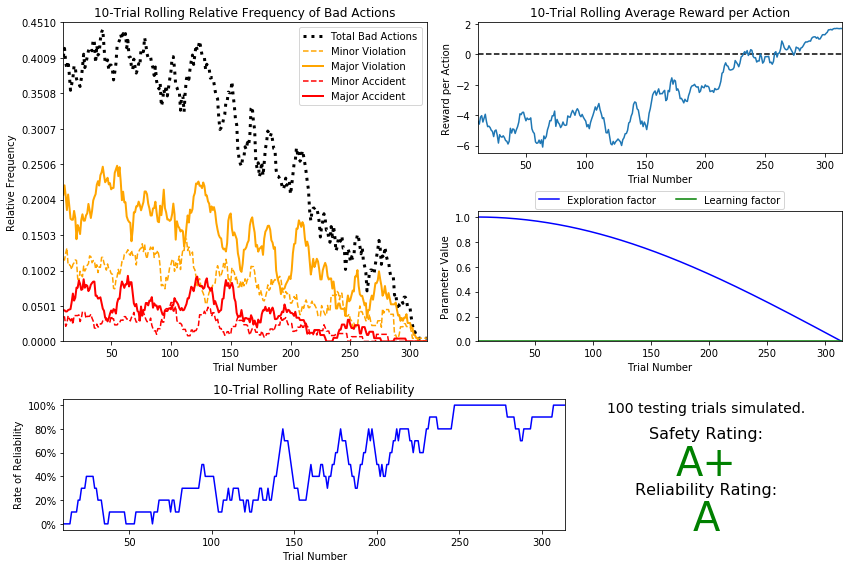

0

In [19]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')
duration = 1  # second
freq = 140  # Hz
os.system('play --no-show-progress --null --channels 1 synth %s sine %f' % (duration, freq))
os.system('spd-say "your program has finished"')

Example SIN alpha


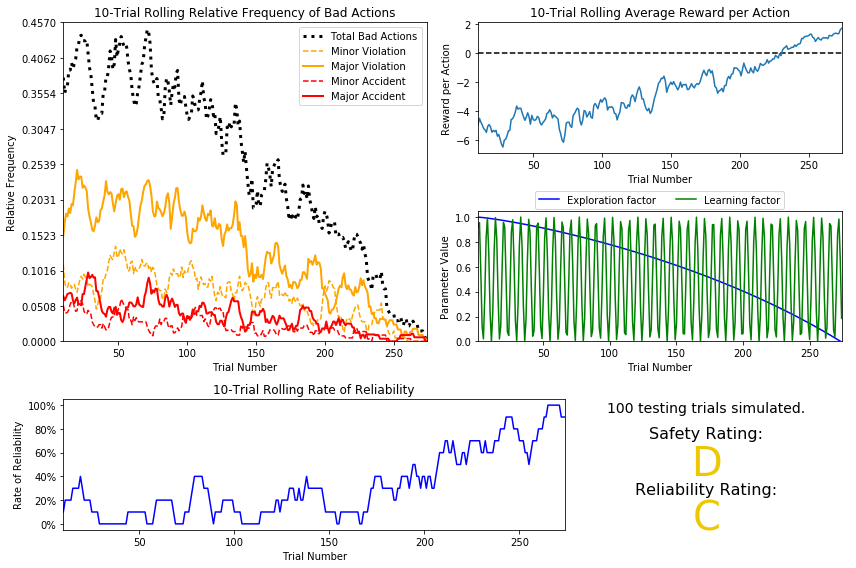

Linear decay


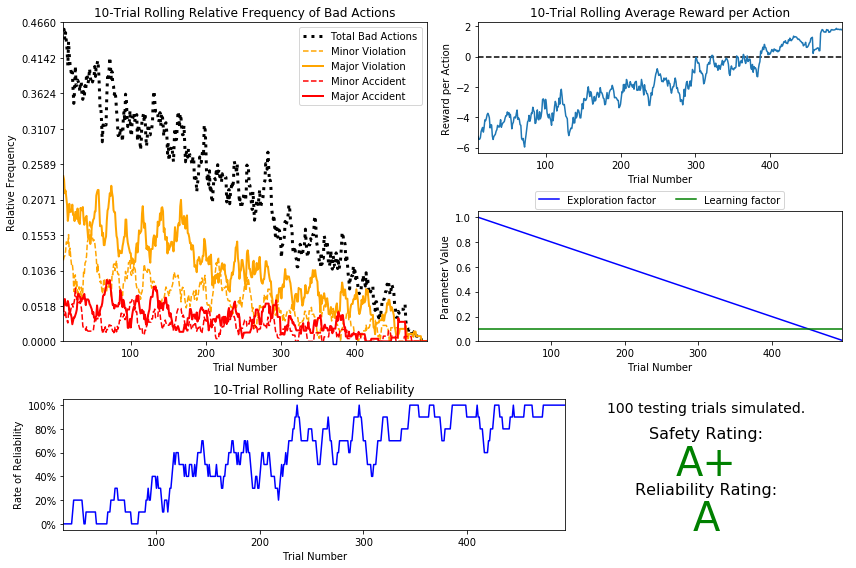

Exponential 1 decay


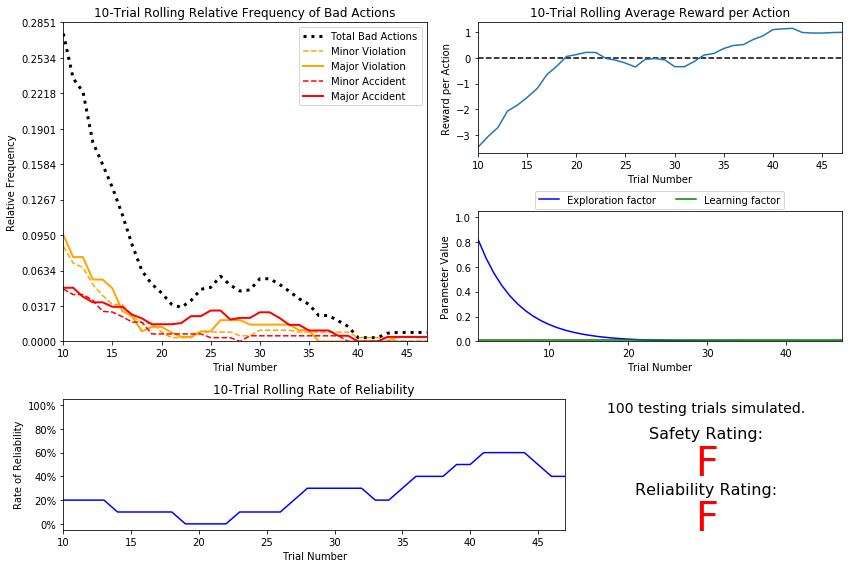

Exponential 2 decay


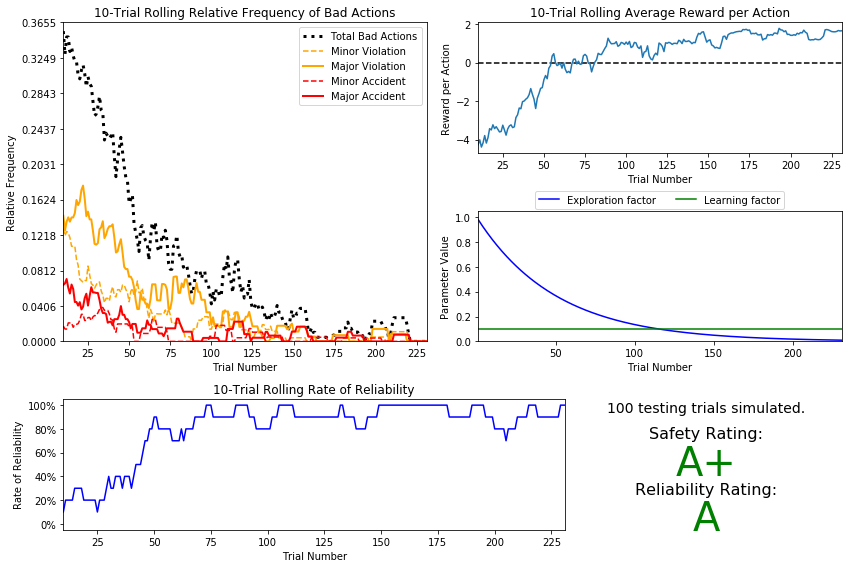

Sin decay


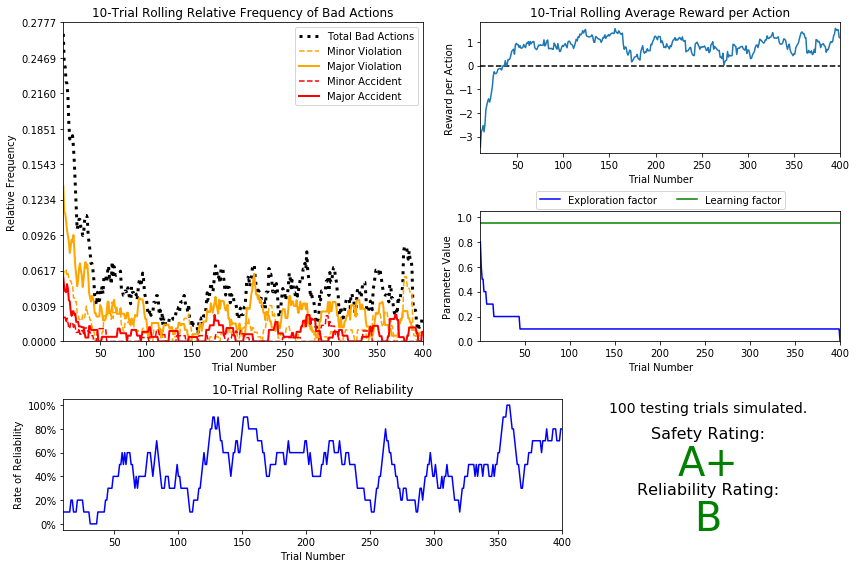

Log decay


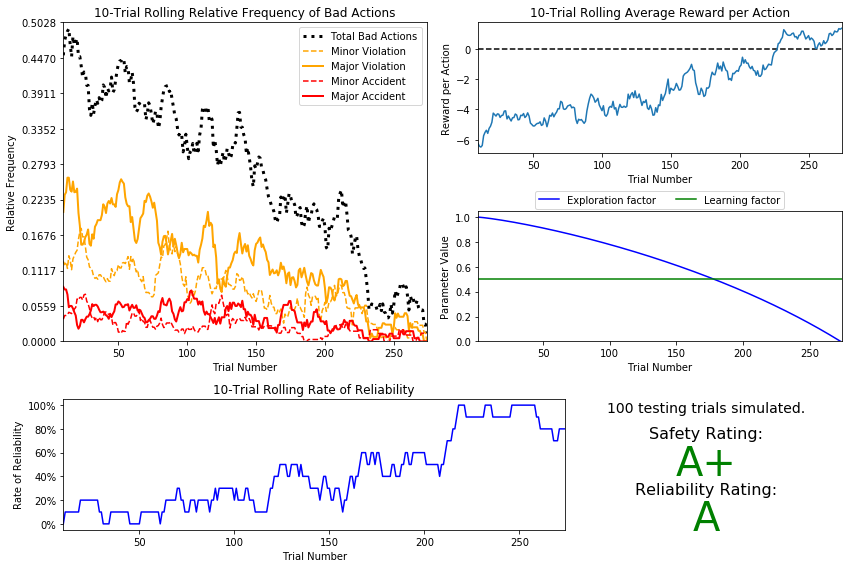

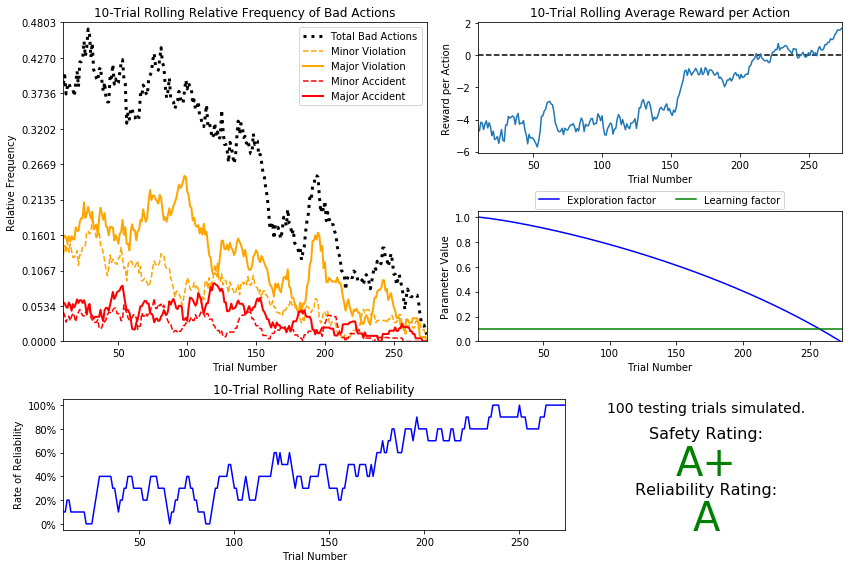

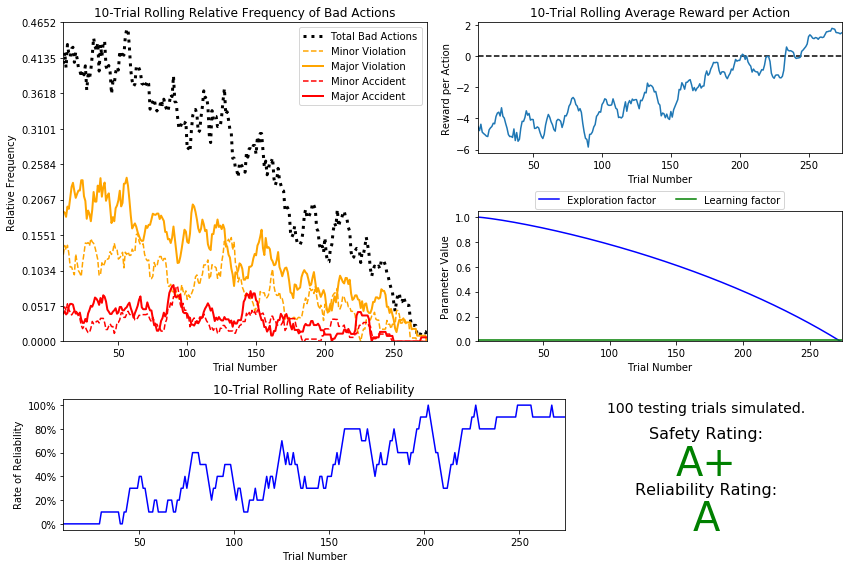

Cos decay


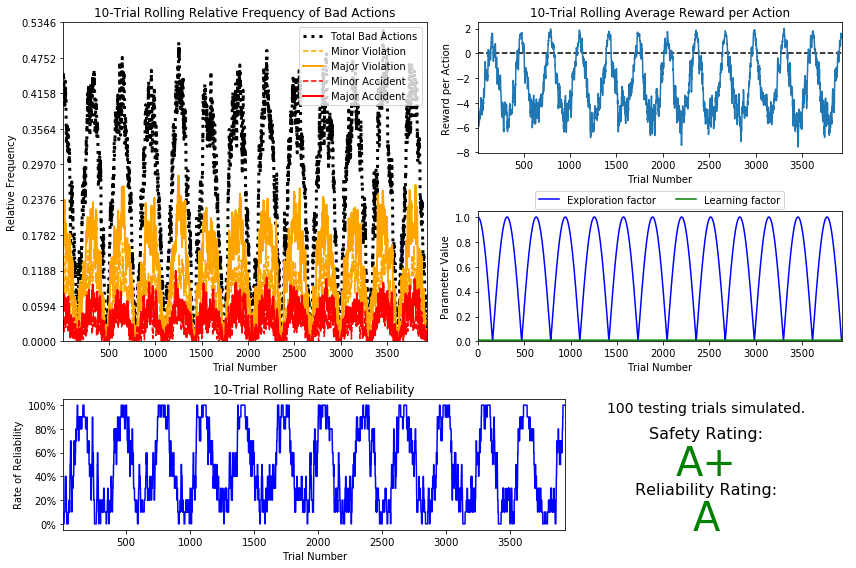

In [16]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
print ('Example SIN alpha')
vs.plot_trials('sim_improved-learning-LOG-alpha-SIN-Tolerance-0_0001.csv')
print ('Linear decay')
vs.plot_trials('sim_improved-learning-Linear-Alpha-0_1-Tolerance-0_01.csv')
print('Exponential 1 decay')
vs.plot_trials('sim_improved-learning-Exponential1-Alpha-0_01-Tolerance-0_0001.csv')
print('Exponential 2 decay')
vs.plot_trials('sim_improved-learning-Exponential2-Alpha-0_1-Tolerance-0_01.csv')
print('Sin decay')
vs.plot_trials('sim_improved-learning-SIN-alpha-0_95-Tolerance-0_01.csv')
print('Log decay')
vs.plot_trials('sim_improved-learning-LOG-Alpha-0_5-Tolerance-0_0001.csv')
vs.plot_trials('sim_improved-learning-LOG-Alpha-0_1-Tolerance-0_0001.csv')
vs.plot_trials('sim_improved-learning-LOG-Alpha-0_01-Tolerance-0_0001.csv')
print('Cos decay')
vs.plot_trials('sim_improved-learning-COS-Alpha-0_01-Tolerance-0_0001.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:**

- **What decaying function was used for epsilon (the exploration factor)?**<br>
Overall, what I tried to look implementing a variety of functions was to understand the behaviour of the reward, bad actions, and reliability through time. As seen in the charts above, the performance of these parameters is correlated with how the function. For instance, if we observe the last chart with the COS function, the bad actions have a similar behaviour than the decay function, as the exploration factor decrease, the frequency of bad actions also drop. Moreover, the reward and the reliability have an opposite result compared to the exploration. That is, as the exploration factor falls, the reward and the reliability increase, both almost at the same time.

The 6 functions with different variables are:
- 1) Linear, newEpsilon = epsilon -0.002 
- 2) Exponential1, newEpsilon =  math.exp(-self.t/5.0)
- 3) Exponential2, newEpsilon =  math.exp(-self.t/50.0)
- 4) Sin, newEpsilon = math.sin(1/math.pow(self.t,0.5))
- 5) Log, newEpsilon = math.log10(2-0.0009*math.pow(self.t, 1.25))/math.log10(2)
- 6) Cos, newEpsilon =  math.fabs(math.cos(self.alpha*self.t)) *with the fabs function I guarantee that the function will go from 1 to 0.
<br>
- **Approximately how many training trials were needed for your agent before begining testing?**<br>
It depends on the decaying function. As seen above it went from 47 with a exponential decay function = e^(t/5) to 3927 with the COS function.<br>
- **What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?**<br>
In general, I realised that the model did not require many trials to obtain a good 'safety' score when the decay function decrease constantly and the epsilon-tolerance value is small(i.e. close to 0). It might be possible that having a small value in the tolerance, force the model to not commit any safety violation. Also, a constant and continuous decay allows the model to learn the safety rules faster.

In contrast, the 'reliability' score required more experimentation in order to obtain good results. After many trials, I observed that as smaller the alpha, the model learns better reliability rules combined with a declining function. Here I present a table with most of the combinations that I tried. I ran more than twice each configuration to be sure that these results can be replicated more than once and were not a coincidence. Additionally, I tried a SIN function for the learning rate in order to know whether the model could improve with a nonconstant value in alpha, something that did not happen. In the first chart presented above, it can be seen an example of the SIN function implemented in the learning rate.




| Tolerance | Alpha | Decay | Safety | Reliability |
|------|------|------|------|------|
|0.01|	0.95|linear|	A+|	F|
|**0.01**|**	0.5**|**linear**|**	A+**|**	A**|
|**0.01**|**	0.1**|**linear**|**	A+**|**	A**|
|**0.01**|**	0.01**|**linear**|**A+**|**	A**|
|**0.001**|**	0.01**|**linear**|**A+**|**	A**|
|**0.0001**|**0.01**|**linear**|**A+**|**	A**|
|**0.0001**|**Sin**|**linear**|**	A+**|**	A**|
|0.01|0.95|	Exponential1|F|	F|
|0.01|0.5|	Exponential1|F|	C|
|0.01|0.1|	Exponential1|F|	F|
|0.01|0.01|	Exponential1|F|	F|
|0.001|0.01|Exponential1|F|	F|
|0.0001|0.01|	Exponential1|	F|	F|
|0.0001|Sin|	Exponential1|	F|	F|
|0.01|0.95|	Exponential2|A+|	F|
|0.01|0.5|	Exponential2|F|	C|
|**0.01**|**0.1	**|**Exponential2**|**A+**|**A**|
|0.01|0.01|	Exponential2|A+|B|
|0.001|	0.01|	Exponential2|A+|B|
|0.0001|0.01|	Exponential2|A+|D|
|0.0001	|Sin|Exponential2|A+|F|
|0.01|	0.95|SIN|A+|	B|
|0.01|	0.5|SIN|A+|	D|
|0.01|	0.1	|SIN|	A+|	F|
|0.01|	0.01|	SIN|A+|	F|
|0.001|	0.01|	SIN|A+|	F|
|0.0001|	0.01|SIN|A+|F|
|0.0001|Sin|	SIN|A+|	F|
|0.0001|0.95|LOG|A+|	F|
|**0.0001**	|**0.5**|**	LOG**|**	A+**|**	A**|
|**0.0001**|**0.1**|**LOG**|**A+**|**	A**|
|**0.0001**|**0.01**|**LOG**|**A+**|**A**|
|**0.0001**|**0.0001**|**	LOG**|**A+**|**	A**|
|**0.0001**|**0.0008**|**	LOG**|**A+**|**	A**|
|0.0001|	SIN|	LOG|D|	C|
|0.01|	0.95|	COS|	A|	F|
|0.01|	0.5|	COS|	F|	D|
|0.01|	0.1|	COS|	F|	A|
|0.01|	0.01|	COS|	F|	A|
|0.001|	0.01|	COS|	F|	A|
|**0.0001**|**	0.01**|**	COS**|**	A+**|**	A**|

In one hand, as seen in the table above, we can conclude that the Tolerance influence the 'Safety' score. That is, if we have a tolerance of 0.0001, scores of A can be achieved, maybe except for the 'exponential1' decay function, which I consider is more related to the 47 trials, too few for the model to learn the entire states as seen previously in the montecarlo chart. 

In the other hand, I could not found combinations that could provide 'Reliability' scores of A+, just A's. During testing, I obtained A+ scores in 'Reliability' only when I reduced the number of testing, for example only 50 and below. However, I consider that less than 100 number of tests are not entirely trustworthy.
<br>
- **How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?**<br>
The improvement from the previous Q-Learner can be perceived in the 3 metrics that we are considering, the frequency of bad actions, reward per action, and the reliability rate. 

In the first learner, we observed that the total bad action rounded between 0.37 and 0.16, we never got a positive reward since it went from -5 to -2 and a steady reliability of 40%. In contrast, we can observe that the improved learners excel in any of these 3 variables. 

First, the 'Exponential 1' decay obtained positive reward after just 30 trials, meanwhile de 'Exponential 2' and 'SIN' functions after 50 trials. Second, the Frequency of bad actions was reduced to almost 0 in all de decay functions and constantly 0 after 80 trials in the 'exponential2' function. Last, the reliability percentage gradually increased in the all the decayfunctions to achieve 100 in many trials. Meanwhile, the 'Linear' function obtained a reliability above 60% after just 110 trials, 'Exponential2' between 90% and 100% requiring only 75 trials, and 'LOG' between 80% and 100% from the trial 200 approximately until the end.
<br>
- **Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?**<br>
Yes, it is clear from the results above that the decay function, the tolerance, the learning rate, and the time are key factors for the model to learn correct policies. 
<br>
- **Are you satisfied with the safety and reliability ratings of the *Smartcab*?**<br>
Yes, I am more satisfied that using different approaches I obtained similar results. That is, the best model does not have to be the one with the best scores since I obtained 13 A+-A scores and three A+-B. If we were looking for the fastest model, I would choose the 'Exponential 2' with 0.01 tolerance and 0.1 alpha rate. The best score with the fewer trials goes for 'Exponential2' with 231 trials, tolerance of 0.01 and alpha value of 0.1. And the most reliable model is 'LOG' since we obtained with different values A+-A scores constantly.  
<br>

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8

1. Please summarize what the optimal policy is for the smartcab in the given environment. What would be the best set of instructions possible given what we know about the environment? 
   _You can explain with words or a table, but you should thoroughly discuss the optimal policy._

2. Next, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ 

3. Provide a few examples from your recorded Q-table which demonstrate that your smartcab learned the optimal policy. Explain why these entries demonstrate the optimal policy.

4. Try to find at least one entry where the smartcab did _not_ learn the optimal policy.  Discuss why your cab may have not learned the correct policy for the given state.

Be sure to document your `state` dictionary below, it should be easy for the reader to understand what each state represents.

**Answer:** 

- 1) We can resume the optimal policies with a table as follows:

||WAYPOINT|
|------|------|------|------|
|**LIGHT**| Right|Left|Forward|
|Red|if input.left =forward then action=none, else action=right|action= none| action = none|
|Green|action=right| if input.forward = forward or right then action=none, else action = left|action=forward|

As seen in the table, the 96 states can be divided into 48 states for green and red, and then each one can be subdivided into 16 states grouped by light and waypoint. The simple cases are 2. First, when the light is 'red' and the waypoint is either 'left' or 'forward', the result is to not conduct any action. Second, when the light is 'green' and the waypoint is 'right' or 'forward', the policy should always go to the corresponding waypoint. 

For the state with the red light and the waypoint 'right', the agent needs to check if the car from the left is not going straight, in case that is affirmative, then, it can proceed to move to the right, otherwise should not move. Another scenario is when the light is green and the waypoint is 'left', the agent needs to check the car across the street, if that agent is going 'forward' or turning 'right', then the agent should not move, otherwise, it can turn left.

- 2, 4) No, in different states the agent did not learn the optimal policy. As mentioned previously, the optimal policy when there is a red light should be 'None', except  to avoid any penalty in the 'Safety' score. However, looking into the file there are time that the agent choose to move. For example:

('forward', 'red', 'right', 'right')<br>
 -- forward : 0.00<br>
 -- left : 0.00<br>
 **-- right : 0.02**<br>
 -- None : 0.00<br>
 
 ('forward', 'red', 'right', 'left')<br>
 -- forward : -0.20<br>
 -- left : -0.21<br>
 **-- right : 0.14**<br>
 -- None : 0.01<br>
 
 ('left', 'red', 'left', 'left')<br>
 -- forward : -0.11<br>
 -- left : -0.49<br>
 **-- right : 0.20**<br>
 -- None : 0.09<br>

('left', 'red', None, 'right')<br>
 -- forward : -0.39<br>
 -- left : -3.81<br>
 **-- right : 0.14**<br>
 -- None : 0.09<br>
 
 In the previous states, the agent decided to move to the waypoint contrary to choose 'None'.Altought, even when the decision is not the optimal and the agent commits a traffic violation, it manage to avoid any potential collision. That could be the reason why the agent selects that action instead to stay.
 
- 3) Another examples where the agent learned the optimal policy could be the following:
 
 ('left', 'green', None, None) <br>
 -- forward : 0.46 <br>
 **-- left : 2.33** <br>
 -- right : 0.55 <br>
 -- None : -2.07 <br>
 
 ('right', 'green', None, None) <br>
 -- forward : 0.37<br>
 -- left : 0.56<br>
 **-- right : 2.49**<br>
 -- None : -1.43<br>
 
 ('forward', 'green', 'right', 'right')<br>
 **-- forward : 0.03**<br>
 -- left : 0.00<br>
 -- right: 0.00<br>
 -- None : 0.00<br>
 
 ('left', 'green', 'right', 'None')<br>
 -- forward : 0.05<br>
 **-- left : 0.28**<br>
 -- right : 0.04<br>
 -- None : -0.19<br>
 
 
 The previous states prove that the agent learned optimal policies for clear scenarios. The first two states are the easiest to learn. Since there are no other agents in the environment the expected behaviour for the car is to keep the waypoint. The difference between the rating score from the optimal action with any nonoptimal is more than 2 points. 
 
 The other two states are less clear than the previous two, however, are states where no potential collision is visible, and the agent should continue its route to the waypoint. In both cases the agent is not in potential danger from none of the other cars presented in the environment, the three agents go to different directions without any possibility of collision, maybe in the third case {forward, green, right, forward} the agents from the left and across the street could collide but we do not have any rule for such case and it does not concern us.


-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propagating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**

It might be possible that one of the characteristics is that the agent perceives a small portion of its environment. That is, it will take one decision based on the waypoint and the other two directions(i.e. left, across), but the agent never knows the exact position of the final destination, and it does not know the state of the other agents around it. This problem does not allow the agent to learn never an optimal path or improve the destination route. We do not calculate the entire probability of arriving at the destination on time based on the current position and the final destination. And last, the agent does not take the best action for a future state, just for the immediate one.  

Regarding the environment, we can focus on two main characteristics: the destination and the agents. The first one is randomly chosen which affects negatively the learning. For instance, if the agent during a trial obtained a positive reward after following a specific route, it might be possible that for a next trial the same route produces negative rewards or results. The second one, the agents, follow random instructions which might not help the model to understand a comprehensive behaviour when having cars near.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.